# Introduction

This dataset captures user engagement metrics from an online course platform, facilitating analyses on factors influencing course completion. It includes user demographics, course-specific data, and engagement metrics. The aim of the project is to predict the completion of the course by users using machine learning algorithms. The following algorithms were used in the project: logistic regression, support vector machine, decision tree, random forest, XGBoost

In [ ]:
pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=61590189995f8acd580c38be1d8ec982dcaafbe9d3b4c21d690456369937b315
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import plot_tree
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Preliminary data analysis
## Data size

* Number of records (rows)
* Number of features (columns)

In [ ]:
online_course = pd.read_csv('/content/online_course_engagement_data.csv') #data import

In [ ]:
online_course.shape # shape of data

(9000, 9)

The dataset contains 9000 rows and 9 columns.

**UserID:** Unique identifier for each user

**CourseCategory:** Category of the course taken by the user (e.g., Programming, Business, Arts)

**TimeSpentOnCourse:** Total time spent by the user on the course in hours

**NumberOfVideosWatched**: Total number of videos watched by the user

**NumberOfQuizzesTaken:** Total number of quizzes taken by the user

**QuizScores:** Average scores achieved by the user in quizzes (percentage)

**CompletionRate:** Percentage of course content completed by the user

**DeviceType:** Type of device used by the user (Device Type: Desktop (0) or Mobile (1))

**CourseCompletion** (Target Variable): Course completion status (0: Not Completed, 1: Completed)

# Manual review of examples

In [ ]:
online_course.head() # display the first 5 rows

UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0    5618         Health          29.979719                     17   
1    4326           Arts          27.802640                      1   
2    5849           Arts          86.820485                     14   
3    4992        Science          35.038427                     17   
4    3866    Programming          92.490647                     16   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                     3   50.365656       20.860773           1   
1                     5   62.615970       65.632415           1   
2                     2   78.458962       63.812007           1   
3                    10   59.198853       95.433162           0   
4                     0   98.428285       18.102478           0   

   CourseCompletion  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0

In [ ]:
online_course.tail() # display the last 5 rows

UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
8995    8757         Health          37.445225                     14   
8996     894        Science          48.631443                      7   
8997    6323         Health          38.212512                      3   
8998    3652         Health          70.048665                     13   
8999    5595         Health          93.589781                      7   

      NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
8995                     4   54.469359       32.990704           1   
8996                     7   59.413257        0.254625           0   
8997                     3   69.508297       70.188159           1   
8998                    10   79.655182       72.975225           1   
8999                     5   56.274546       11.299071           0   

      CourseCompletion  
8995                 0  
8996                 0  
8997                 0  
8998                 1  
8999                 0

In [ ]:
online_course.sample(10) # display 10 random samples

UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
4162     303    Programming          50.219561                      7   
1140     579       Business          69.123648                      3   
4288    2094         Health          30.347632                     16   
7391    1879       Business          55.165637                     14   
8033    1479         Health          41.863074                     19   
5745    3646       Business          20.968296                      7   
8741    7203    Programming          82.678852                      5   
7382    1783           Arts          32.945687                     17   
6780    1190        Science          24.106231                      4   
4923    5306        Science          27.936332                     13   

      NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
4162                     4   66.304399       83.158807           0   
1140                    10   92.995495       51.361946           0   
4288                     1   59.942438       81.097243           0   
7391                     2   87.104128       24.837574           1   
8033                     3   53.907746       77.985956           1   
5745                    10   81.654613        3.420384           1   
8741                     8   84.307211       54.147893           0   
7382                     4   61.834962       58.216024           0   
6780                     0   54.870045       59.344786           0   
4923                     3   58.980715       74.150926           0   

      CourseCompletion  
4162                 1  
1140                 0  
4288                 0  
7391                 0  
8033                 0  
5745                 1  
8741                 0  
7382                 0  
6780                 0  
4923                 0

## Distribution of feature values

 * Value ranges
 * Distributions
 * Reasonableness of the data
 * Basic statistical parameters (mean, median, percentiles, variance).

In [ ]:
online_course.info() #display type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


In [ ]:
online_course.describe() # numerical variable statistics

UserID  TimeSpentOnCourse  NumberOfVideosWatched  \
count  9000.000000        9000.000000            9000.000000   
mean   4498.894556          50.163822              10.024667   
std    2596.849433          28.491750               6.029878   
min       1.000000           1.005230               0.000000   
25%    2251.750000          25.440548               5.000000   
50%    4483.500000          49.818417              10.000000   
75%    6751.250000          75.069924              15.000000   
max    9000.000000          99.992558              20.000000   

       NumberOfQuizzesTaken   QuizScores  CompletionRate   DeviceType  \
count           9000.000000  9000.000000     9000.000000  9000.000000   
mean               5.090556    74.706028       50.340146     0.500667   
std                3.157762    14.378383       28.950977     0.500027   
min                0.000000    50.005119        0.009327     0.000000   
25%                2.000000    62.283451       25.653614     0.000000   
50%                5.000000    74.743294       50.264124     1.000000   
75%                8.000000    87.022663       75.572493     1.000000   
max               10.000000    99.994984       99.979711     1.000000   

       CourseCompletion  
count       9000.000000  
mean           0.396444  
std            0.489186  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            1.000000

In [ ]:
profile = ProfileReport(online_course, title="Profiling Report") # Profiler Report  is used for automated data exploration and generating reports that include detailed descriptive statistics, visualizations, and information about the distributions of variables in the dataset.


In [ ]:
%%time
profile

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("your_report1.json")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Description of Report

## Variable Types
* Numeric Variables: UserID, TimeSpentOnCourse, NumberOfVideosWatched,
NumberOfQuizzesTaken, QuizScores, CompletionRate
* Categorical Variables: CourseCategory, DeviceType, CourseCompletion
* Missing Values: There are no missing values in the dataset.
* Duplicate Records: There are 877 duplicate records.

**Analysis of Key Variables**


1. UserID:
* Description: This variable represents the unique identifier for users in the dataset.
* Distinct Values: There are 8123 distinct UserIDs, meaning that not every user is unique (some duplicates exist).
* Duplicates: Approximately 9.74% of the records are duplicates, which suggests that some users may appear multiple times in the dataset
* Minimum Value: 1
* Maximum Value: 9000

2. TimeSpentOnCourse:

* Description: This variable likely represents the amount of time a user spent on a course
* Minimum Value: 1.005 hours
* Maximum Value: 99.993 hours

3. NumberOfVideosWatched:

* Description: This variable tracks the number of videos a user has watched.
* Minimum Value: 0 videos
* Maximum Value: 20 videos

4. NumberOfQuizzesTaken:

* Description: This represents the number of quizzes a user has taken.
* Minimum Value: 0 quizzes
* Maximum Value: 10 quizzes

5. QuizScores:

* Description: This variable likely contains the scores a user achieved in quizzes.
* Minimum Value: 50.005%
* Maximum Value: 99.995%

6. CompletionRate:

* Description: This represents the rate at which a user completed the course
* Minimum Value: 0.009%
* Maximum Value: 99.980%
7. CourseCategory:

* Description: This variable categorizes the courses into different types or subjects.
* Distinct Categories: 5 (Business, Health, Science, Programming, Arts).
* Distribution: Business (1837), Health (1821), Science (1814),Programming (1810), Arts (1718)
8. DeviceType:

* Description: This variable indicates the type of device used by the user
* Distinct Categories: 2
* Distribution: 1 (Possibly Mobile): 4506 occurrences
0 (Possibly Desktop): 4494 occurrences


9. CourseCompletion:
* Description: This variable likely indicates whether the course was completed (e.g., Yes/No).
* Distrinct Caterogires 2: 0 (Not Completed): 5432 occurrences
1 (Completed): 3568 occurrences
* Distribution: 0 (5432), 1 (3568)

**Key Correlations** :
1. CompletionRate:

* CourseCompletion: 0.3869 (Moderate positive correlation)
* TimeSpentOnCourse: 0.0210 (Weak positive correlation)
* NumberOfQuizzesTaken: 0.0070 (Very weak positive correlation)
* NumberOfVideosWatched: 0.0163 (Very weak positive correlation)
* QuizScores: -0.0124 (Very weak negative correlation)
* UserID: -0.0062 (Very weak negative correlation)
* DeviceType: 0.0 (No correlation)
* CourseCategory: 0.0 (No correlation)

2. CourseCompletion:

* CompletionRate: 0.3869 (Moderate positive correlation)
* TimeSpentOnCourse: 0.2492 (Weak positive correlation)
* NumberOfQuizzesTaken: 0.3500 (Moderate positive correlation)
* NumberOfVideosWatched: 0.2928 (Weak positive correlation)
* QuizScores: 0.3486 (Moderate positive correlation)
* UserID: 0.0705 (Weak positive correlation)
* DeviceType: 0.0 (No correlation)
* CourseCategory: 0.0 (No correlation)
3. NumberOfQuizzesTaken:

* CourseCompletion: 0.3500 (Moderate positive correlation)
* CompletionRate: 0.0070 (Very weak positive correlation)
* NumberOfVideosWatched: -0.0202 (Very weak negative correlation)
* QuizScores: -0.0123 (Very weak negative correlation)
* TimeSpentOnCourse: -0.0124 (Very weak negative correlation)
* UserID: -0.0012 (No correlation)
* DeviceType: 0.0177 (Very weak positive correlation)
* CourseCategory: 0.0 (No correlation)
4. NumberOfVideosWatched:

* CourseCompletion: 0.2928 (Weak positive correlation)
* CompletionRate: 0.0163 (Very weak positive correlation)
* NumberOfQuizzesTaken: -0.0202 (Very weak negative correlation)
* QuizScores: -0.0176 (Very weak negative correlation)
* TimeSpentOnCourse: 0.0195 (Very weak positive correlation)
* UserID: 0.0183 (Very weak positive correlation)
* DeviceType: 0.0250 (Very weak positive correlation)
* CourseCategory: 0.0292 (Very weak positive correlation)
5. QuizScores:

* CourseCompletion: 0.3486 (Moderate positive correlation)
* CompletionRate: -0.0124 (Very weak negative correlation)
* NumberOfQuizzesTaken: -0.0123 (Very weak negative correlation)
* NumberOfVideosWatched: -0.0176 (Very weak negative correlation)
* TimeSpentOnCourse: -0.0062 (No correlation)
* UserID: -0.0109 (Very weak negative correlation)
* DeviceType: 0.0 (No correlation)
* CourseCategory: 0.0 (No correlation)
6. TimeSpentOnCourse:

* CourseCompletion: 0.2492 (Weak positive correlation)
* CompletionRate: 0.0210 (Very weak positive correlation)
* NumberOfQuizzesTaken: -0.0124 (Very weak negative correlation)
* NumberOfVideosWatched: 0.0195 (Very weak positive correlation)
* QuizScores: -0.0062 (No correlation)
* UserID: 0.0089 (Very weak positive correlation)
* DeviceType: 0.0 (No correlation)
* CourseCategory: 0.0089 (Very weak positive correlation)
7. DeviceType:

* CourseCompletion: 0.0 (No correlation)
* CompletionRate: 0.0 (No correlation)
* NumberOfQuizzesTaken: 0.0177 (Very weak positive correlation)
* NumberOfVideosWatched: 0.0250 (Very weak positive correlation)
* QuizScores: 0.0 (No correlation)
* TimeSpentOnCourse: 0.0 (No correlation)
* UserID: 0.0 (No correlation)
* CourseCategory: 0.0 (No correlation)
8. CourseCategory:

* CourseCompletion: 0.0 (No correlation)
* CompletionRate: 0.0 (No correlation)
* NumberOfQuizzesTaken: 0.0 (No correlation)
* NumberOfVideosWatched: 0.0292 (Very weak positive correlation)
* QuizScores: 0.0 (No correlation)
* TimeSpentOnCourse: 0.0089 (Very weak positive correlation)
* UserID: 0.0202 (Very weak positive correlation)
* DeviceType: 0.0 (No correlation)

Moderate positive correlations are observed between CourseCompletion and variables like CompletionRate, NumberOfQuizzesTaken, NumberOfVideosWatched, and QuizScores. Most other correlations are very weak or non-existent, indicating little linear relationship between many of the variables.

In [ ]:
duplicates = online_course[online_course.duplicated()]
duplicates #display the duplicates

UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
351     7812    Programming          76.319366                      0   
383       17        Science          60.902054                      4   
444     4293         Health           4.179856                     15   
456     8734        Science          93.461459                      6   
503     5995       Business          19.671294                      2   
...      ...            ...                ...                    ...   
8978    6019           Arts          37.018679                      9   
8980    4184        Science          11.943595                      8   
8982    6474         Health          72.200459                      5   
8986    5835           Arts          96.596947                      0   
8990     563         Health          63.751132                      0   

      NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
351                      9   67.509219        9.355098           1   
383                     10   82.143128       48.550331           1   
444                      6   64.887538       20.909773           1   
456                      7   78.610963        2.316283           0   
503                      4   95.233215       37.351241           1   
...                    ...         ...             ...         ...   
8978                     9   65.691820       32.681460           1   
8980                     1   65.577109       38.610706           1   
8982                     1   73.765609       68.512431           1   
8986                     5   67.184059       20.690352           0   
8990                     9   53.613262       80.062855           1   

      CourseCompletion  
351                  0  
383                  0  
444                  0  
456                  0  
503                  0  
...                ...  
8978                 0  
8980                 0  
8982                 0  
8986                 0  
8990                 0  

[877 rows x 9 columns]

In [ ]:
online_course_without_duplicates = online_course.drop_duplicates() #removing duplicates

In [ ]:
online_course_without_duplicates.shape

(8123, 9)

# Charts

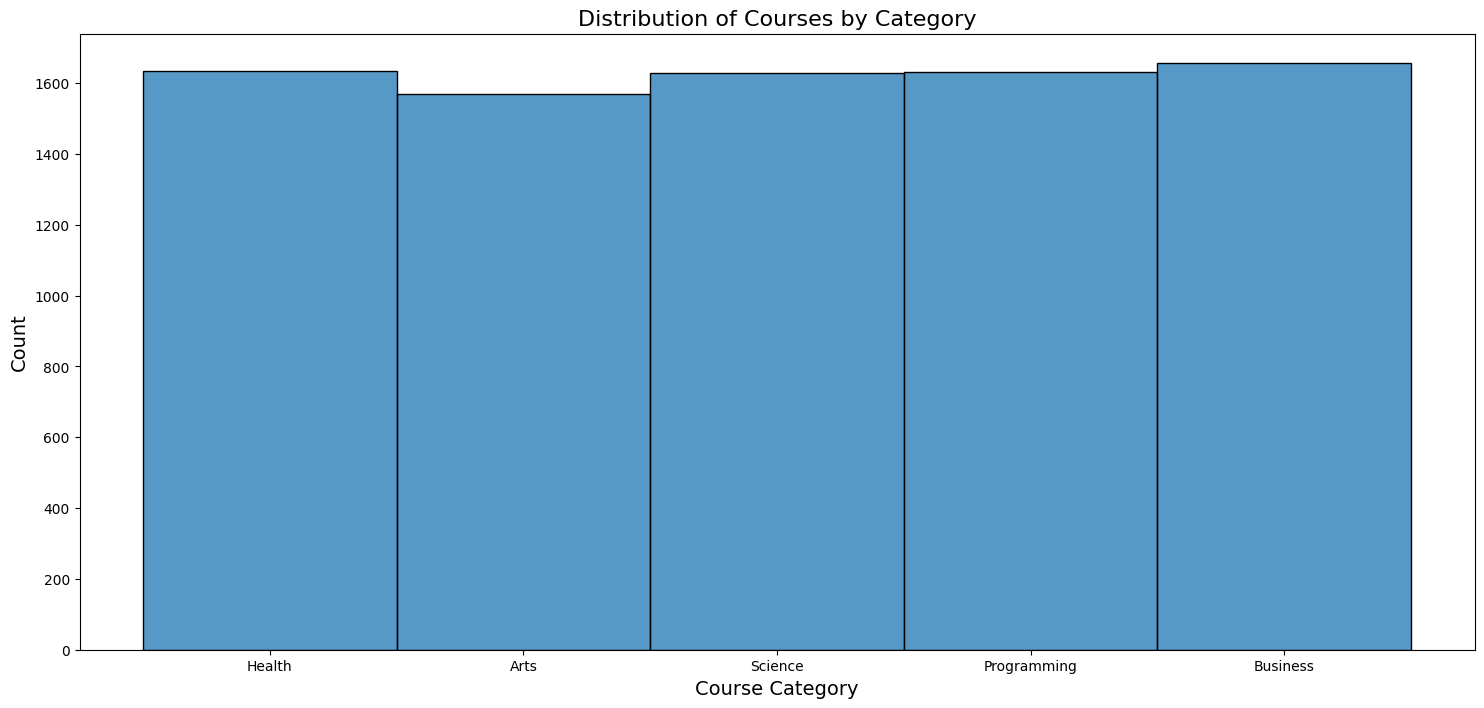

In [ ]:
# Create the histogram plot
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=online_course_without_duplicates, x='CourseCategory', ax=ax)

# Add titles
ax.set_title('Distribution of Courses by Category', fontsize=16)
ax.set_xlabel('Course Category', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Display the plot
plt.show()

The distribution across course categories is relatively balanced, with slight variations. The "Business" category has the highest enrollment, followed closely by "Health" and "Science." "Arts" has the lowest, but still significant, number of enrollments.

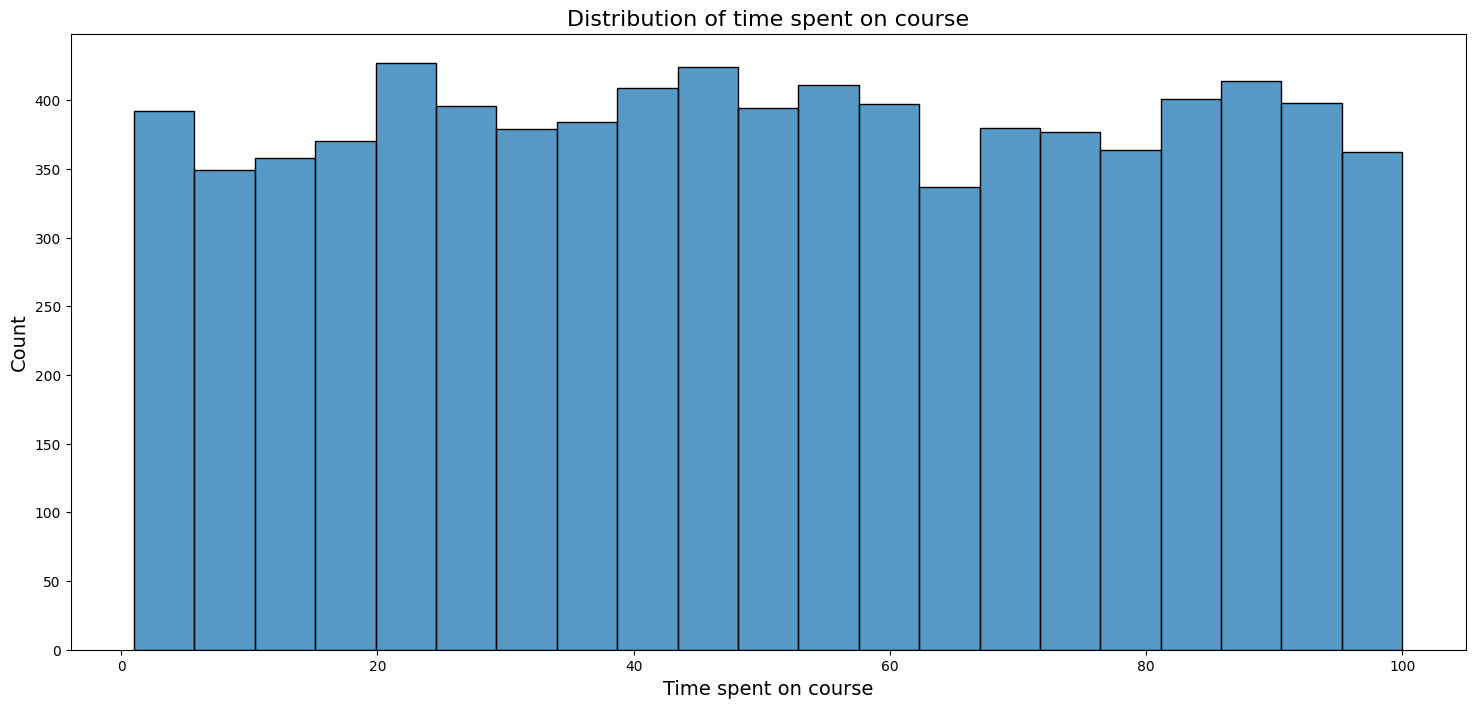

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=online_course_without_duplicates, x='TimeSpentOnCourse', ax=ax)


ax.set_title('Distribution of time spent on course', fontsize=16)
ax.set_xlabel('Time spent on course', fontsize=14)
ax.set_ylabel('Count', fontsize=14)


plt.show()


The range of time spent on the course is between 10 hours and 100 hours.

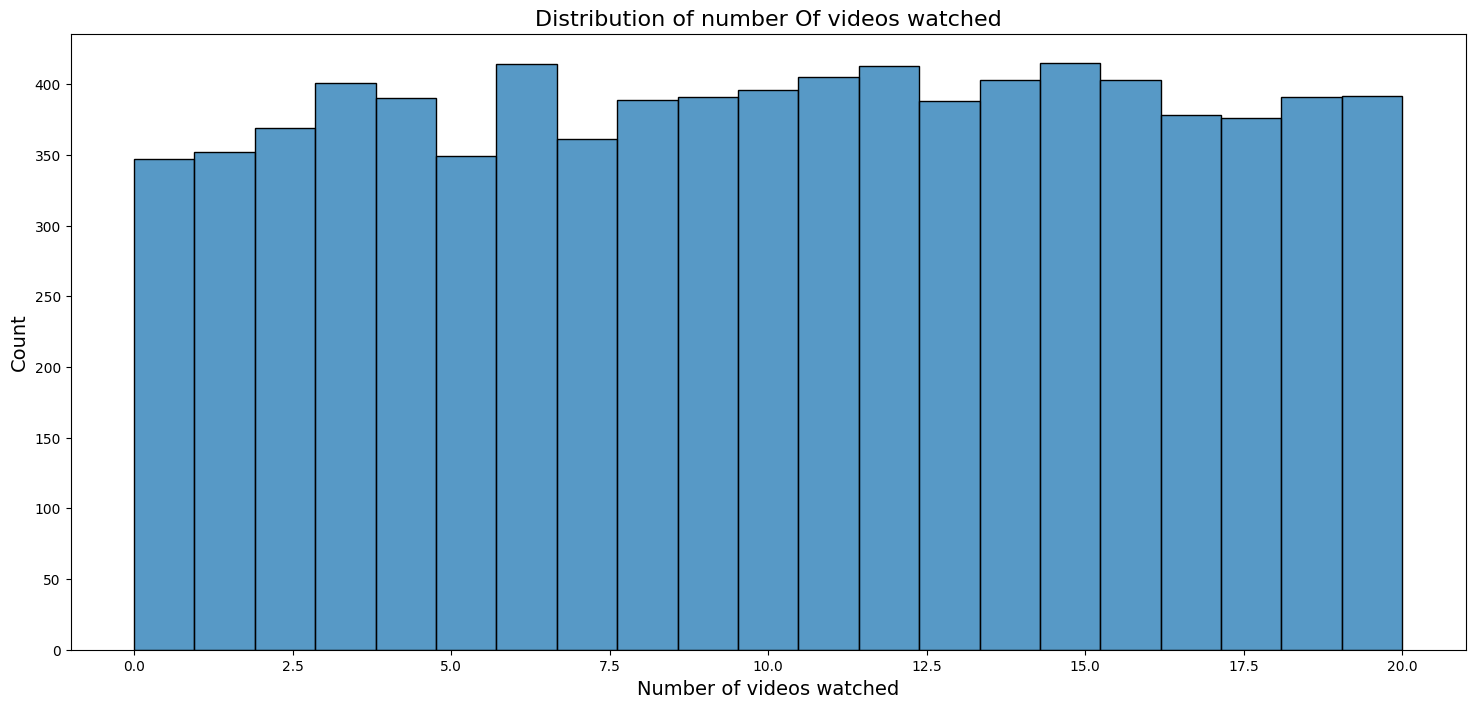

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=online_course_without_duplicates, x='NumberOfVideosWatched', ax=ax)


ax.set_title('Distribution of number Of videos watched', fontsize=16)
ax.set_xlabel('Number of videos watched', fontsize=14)
ax.set_ylabel('Count', fontsize=14)


plt.show()

The range of number of videos watched is between 0 hours and 20.

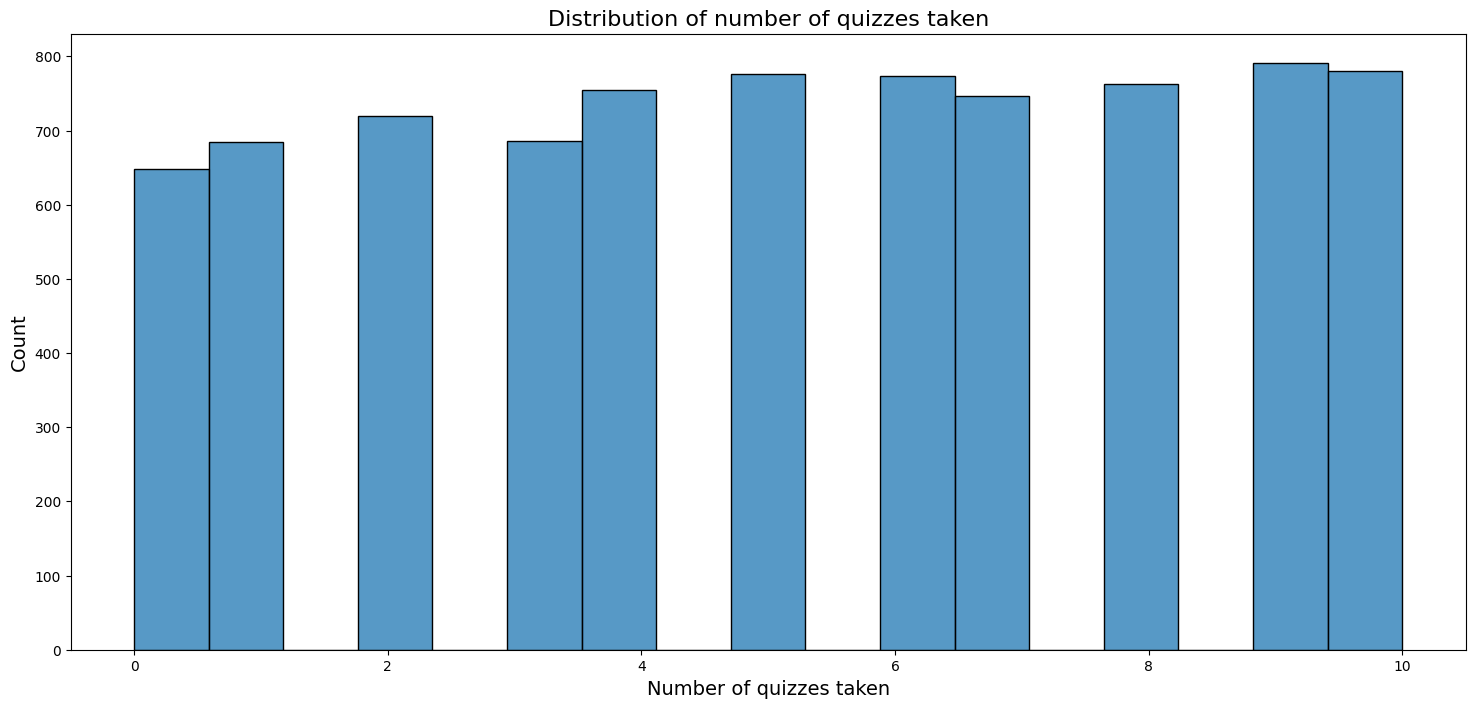

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=online_course_without_duplicates, x='NumberOfQuizzesTaken', ax=ax)


ax.set_title('Distribution of number of quizzes taken', fontsize=16)
ax.set_xlabel('Number of quizzes taken', fontsize=14)
ax.set_ylabel('Count', fontsize=14)


plt.show()

The minimum number of quizzes is 0, while the maximum is 10.

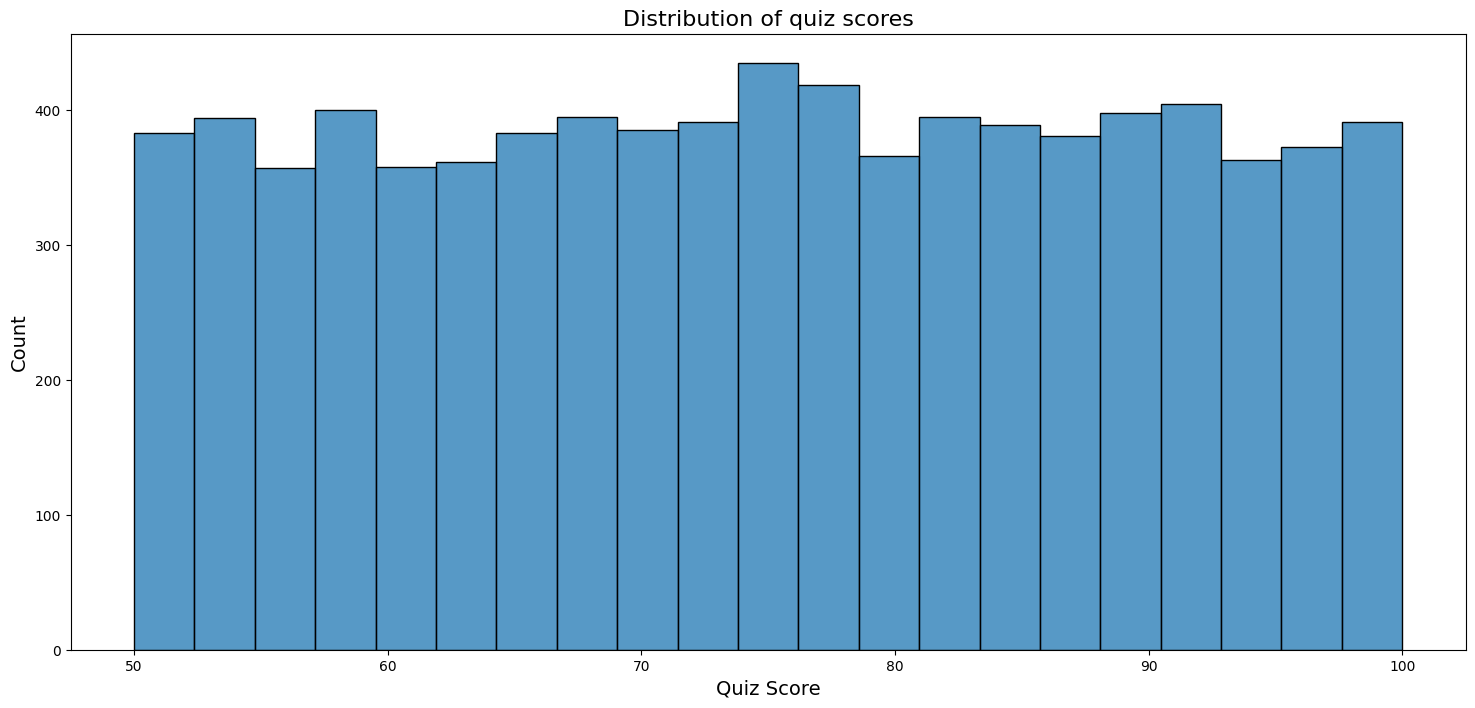

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=online_course_without_duplicates, x='QuizScores', ax=ax)


ax.set_title('Distribution of quiz scores', fontsize=16)
ax.set_xlabel('Quiz Score', fontsize=14)
ax.set_ylabel('Count', fontsize=14)


plt.show()

The range of quiz score is between 50 hours and 100.

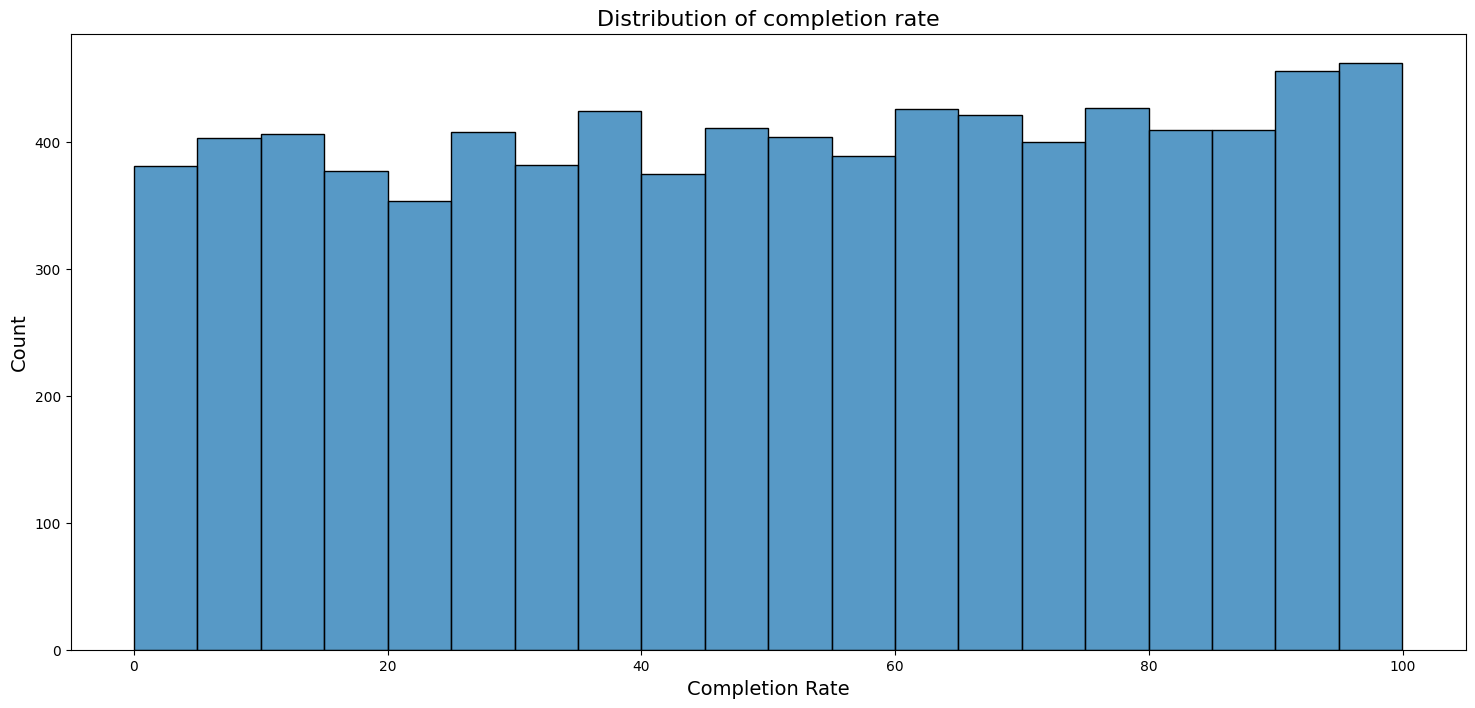

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=online_course_without_duplicates, x='CompletionRate', ax=ax)


ax.set_title('Distribution of completion rate', fontsize=16)
ax.set_xlabel('Completion Rate', fontsize=14)
ax.set_ylabel('Count', fontsize=14)


plt.show()

The range of completion rate is between 0 hours and 100.

# Dodać opis sekcji

In [ ]:
course_device = online_course_without_duplicates.groupby('CourseCategory')['DeviceType'].value_counts().reset_index() #device type grouped by Course Category

In [ ]:
course_device

CourseCategory  DeviceType  count
0           Arts           0    792
1           Arts           1    778
2       Business           0    853
3       Business           1    804
4         Health           1    831
5         Health           0    803
6    Programming           1    827
7    Programming           0    806
8        Science           1    825
9        Science           0    804

In each course category, we see a different number of users utilizing mobile and desktop devices.

We can observe which devices are more popular in different categories. If the number of users utilizing desktop devices is higher in a given category, it may suggest that these courses are better suited for larger screens or that users prefer a more traditional approach to learning. Conversely, a higher number of users on mobile devices might indicate a preference for learning on the go or a more flexible approach to education.

Comparing different categories, it can be observed that some may have a stronger preference for a particular type of device. For instance, if the "Business" category has more users on desktop devices, it might indicate that business courses often require access to tools or applications that perform better on computers. On the other hand, the "Health" category might show a higher number of users on mobile devices, which could suggest that these courses are more suited to short learning sessions that can be completed on a phone.



In [ ]:
online_course_without_duplicates.groupby('CourseCategory')['CourseCompletion'].value_counts().reset_index()

CourseCategory  CourseCompletion  count
0           Arts                 0    871
1           Arts                 1    699
2       Business                 0    924
3       Business                 1    733
4         Health                 0    943
5         Health                 1    691
6    Programming                 0    898
7    Programming                 1    735
8        Science                 0    919
9        Science                 1    710

The table shows how many courses in each category have been completed by users and how many remain unfinished. For example, in the "Arts" category, more courses have not been completed (871) than completed (699). This might suggest that users struggle to maintain engagement in this category. Similarly, the "Business" category also shows a higher number of unfinished courses (924) compared to completed ones (733). This could indicate that the courses in this category are challenging or fail to sufficiently capture users' attention.

In other categories, such as "Health," unfinished courses clearly dominate (943 vs. a smaller number of completed ones, which would be seen in the full table). Such data may highlight the need to improve course structure or adjust educational materials to better support users in their learning process.

In [ ]:
online_course_without_duplicates.groupby('CourseCategory')['NumberOfVideosWatched'].value_counts().sort_values(ascending = False).reset_index()

CourseCategory  NumberOfVideosWatched  count
0           Health                      9     96
1         Business                      8     95
2         Business                      2     95
3          Science                     12     95
4           Health                     15     94
..             ...                    ...    ...
100           Arts                     18     62
101         Health                      2     61
102    Programming                      0     59
103    Programming                      7     57
104        Science                      5     56

[105 rows x 3 columns]

In the "Health" category, the most frequently watched number of videos was 9, occurring in 96 cases. This suggests that 9 videos might be a popular or optimal number within this category, potentially indicating the ideal course length in this field. Similarly, in the "Business" category, the number of users who watched 8 videos (95 cases) and 2 videos (also 95 cases) is identical, which may indicate a diversity in the structure of business courses—ranging from shorter modules to more comprehensive series.

The "Science" category shows a high percentage of users who watched 12 videos (95 cases), suggesting that courses in this category may be more extensive and demanding, engaging users for a longer duration.

It's worth noting that the number of videos watched across different categories is highly varied, indicating different teaching approaches within each field. By analyzing the data, one can draw conclusions about users' preferences regarding course length. For example, in the "Health" category, users are more likely to watch courses that contain around 9-15 videos. This might be the optimal number of videos that users can effectively absorb within a single course.

In contrast, the "Business" category shows more varied results, which may suggest that users in this category have diverse needs—ranging from quick courses to more in-depth analyses.

In [ ]:
online_course_without_duplicates.groupby('CourseCategory')['NumberOfVideosWatched'].mean().reset_index()

CourseCategory  NumberOfVideosWatched
0           Arts              10.178344
1       Business              10.057936
2         Health              10.042840
3    Programming              10.444581
4        Science              10.019030

All course categories have a similar average number of videos watched per course, around 10 videos. The highest average number of videos is found in the "Programming" category (10.44), which might suggest that programming courses are more intensive and require a greater number of video materials to fully cover the topics. Other categories, such as "Arts" (10.18), "Business" (10.06), "Health" (10.04), and "Science" (10.02), have very similar averages, indicating that regardless of the field, courses are designed with a similar level of user engagement in mind when it comes to video content.

This similarity may also reflect platform standards regarding course length and structure that are applied across different disciplines.

In [ ]:
online_course_without_duplicates.groupby('CourseCategory')['CompletionRate'].mean().reset_index()

CourseCategory  CompletionRate
0           Arts       50.680572
1       Business       51.855448
2         Health       51.741130
3    Programming       51.087456
4        Science       50.558421

The average course completion rate across different categories is relatively close, ranging from about 50% to 52%. This indicates that, on average, users completed around half of the course content across all categories.

The highest average completion rate is found in the "Business" category (51.86%), which might suggest that business courses are better aligned with users' needs or that participants are more motivated to complete them. The "Health" category also has a relatively high completion rate (51.74%), which could be due to a strong interest and engagement in health-related courses.

It's noteworthy that the differences between categories are minimal. "Arts" (50.68%), "Programming" (51.09%), and "Science" (50.56%) all have very similar completion rates, suggesting that factors related to user engagement are fairly universal and do not significantly depend on the course subject matter.

This similarity might indicate that the overall course structure and the way they are presented on the platform influence users in a similar manner, regardless of the category.

In [ ]:
online_course_without_duplicates.groupby('CourseCategory')['TimeSpentOnCourse'].mean().reset_index()

CourseCategory  TimeSpentOnCourse
0           Arts          50.226642
1       Business          50.470236
2         Health          51.058388
3    Programming          51.270740
4        Science          49.998186

The average time spent on courses is quite similar across different categories, ranging around 50-51 units of time. The highest average time spent on courses is observed in the "Programming" category (51.27), suggesting that courses in this field are more time-consuming. This could be due to the nature of the material, which often requires a practical approach and deeper engagement.

The "Health" category also shows a relatively high average time (51.06), which might indicate that health-related courses require more time to absorb information or are more complex. Other categories, such as "Arts" (50.23), "Business" (50.47), and "Science" (49.99), have very close average values, which could suggest that courses in these fields are similarly structured in terms of length and intensity.

The "Science" category has the lowest average time spent on a course (49.99), which might suggest that courses in this area are more condensed or that users are able to absorb the material more quickly.

In [ ]:
online_course_without_duplicates.groupby('CourseCategory')['NumberOfQuizzesTaken'].value_counts().reset_index()

CourseCategory  NumberOfQuizzesTaken  count
0            Arts                     8    165
1            Arts                     5    155
2            Arts                     9    153
3            Arts                     2    153
4            Arts                     6    150
5            Arts                     7    139
6            Arts                     4    139
7            Arts                     3    133
8            Arts                    10    129
9            Arts                     1    128
10           Arts                     0    126
11       Business                     6    171
12       Business                     9    169
13       Business                     5    169
14       Business                     7    162
15       Business                     4    154
16       Business                    10    150
17       Business                     8    144
18       Business                     3    140
19       Business                     2    136
20       Business                     1    135
21       Business                     0    127
22         Health                    10    178
23         Health                     9    163
24         Health                     7    156
25         Health                     6    148
26         Health                     5    148
27         Health                     2    148
28         Health                     4    141
29         Health                     1    140
30         Health                     8    139
31         Health                     3    139
32         Health                     0    134
33    Programming                     4    182
34    Programming                    10    167
35    Programming                     8    160
36    Programming                     6    155
37    Programming                     9    145
38    Programming                     7    141
39    Programming                     3    139
40    Programming                     5    139
41    Programming                     2    139
42    Programming                     1    133
43    Programming                     0    133
44        Science                     5    165
45        Science                     9    161
46        Science                    10    156
47        Science                     8    155
48        Science                     6    150
49        Science                     1    148
50        Science                     7    148
51        Science                     2    144
52        Science                     4    139
53        Science                     3    135
54        Science                     0    128

In the "Arts" category, the most common number of completed quizzes is 8, with 165 users reaching this milestone. This indicates that many users in this category engage with a significant number of quizzes, which may reflect a well-designed course structure where quizzes play an integral role in the learning process.

Other popular numbers of completed quizzes include 5, 2, and 9, suggesting a variety of user engagement levels. The diversity in the number of completed quizzes across course categories may reflect different approaches to course design in these fields. Some courses may emphasize quizzes as a primary means of knowledge assessment, while others might focus more on video content or other forms of instruction.

It's worth noting that in the "Arts" category, there is a significant number of users completing a range of quiz counts (from 2 to 9), indicating that courses in this category vary in intensity. This suggests that the "Arts" courses cater to different learning styles and engagement levels, offering a diverse experience for users.

In [ ]:
online_course_without_duplicates.groupby('CourseCategory')['QuizScores'].mean().reset_index()

CourseCategory  QuizScores
0           Arts   75.065091
1       Business   75.426449
2         Health   75.565310
3    Programming   74.774618
4        Science   74.616567

The average quiz scores across all categories are very similar, hovering around 74-75%. This is a relatively high score, suggesting that users generally perform well with the material provided in the courses.

The highest average score was achieved in the "Health" category (75.57%), which might indicate particularly well-designed quizzes or easily comprehensible content in this category. The "Business" category also achieved a high average score (75.43%), possibly reflecting the effectiveness of business courses in conveying knowledge in an understandable manner.

The scores in other categories, such as "Arts" (75.07%), "Programming" (74.77%), and "Science" (74.62%), are very close to each other. This similarity could suggest that the quizzes on the platform are designed with a consistent level of difficulty across different course categories.

These similar values might also indicate that users have comparable skill levels or engagement across various fields, contributing to the uniformity in quiz performance.

In [ ]:
online_course_without_duplicates['TimeSpentOnCourse_bin'] = pd.cut(online_course_without_duplicates['TimeSpentOnCourse'], bins = [0, 10, 30, 50, 70, 100], labels = ['<10', '10-30', '30-50', '50-70', '70-100']) # Binning the 'TimeSpentOnCourse' into intervals

<ipython-input-31-cbb112516930>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_course_without_duplicates['TimeSpentOnCourse_bin'] = pd.cut(online_course_without_duplicates['TimeSpentOnCourse'], bins = [0, 10, 30, 50, 70, 100], labels = ['<10', '10-30', '30-50', '50-70', '70-100']) # Binning the 'TimeSpentOnCourse' into intervals


In [ ]:
online_course_without_duplicates['TimeSpentOnCourse_bin'].value_counts()

TimeSpentOnCourse_bin
70-100    2441
30-50     1677
10-30     1650
50-70     1650
<10        705
Name: count, dtype: int64

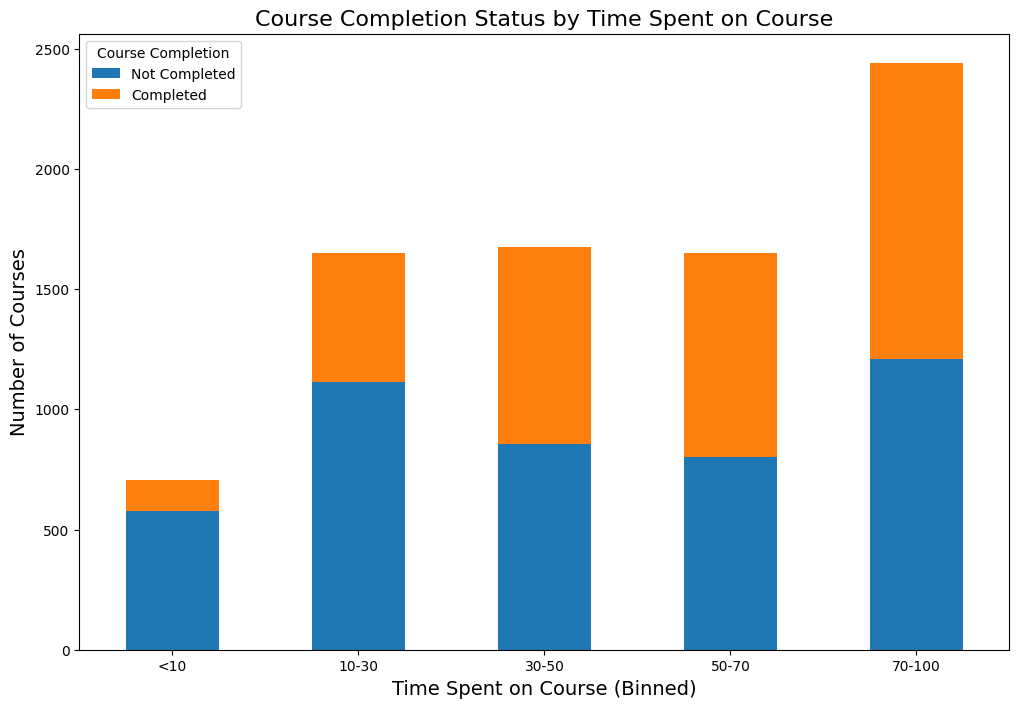

In [ ]:
# Counting the occurrences of combinations of 'TimeSpentOnCourse_bin' and 'CourseCompletion'
time_spent_completion_counts = online_course_without_duplicates[['TimeSpentOnCourse_bin', 'CourseCompletion']].value_counts().unstack()

# Plotting the data
time_spent_completion_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Adding titles and labels
plt.title('Course Completion Status by Time Spent on Course', fontsize=16)
plt.xlabel('Time Spent on Course (Binned)', fontsize=14)
plt.ylabel('Number of Courses', fontsize=14)
plt.legend(title='Course Completion', labels=['Not Completed', 'Completed'])
plt.xticks(rotation=0)

# Display the plot
plt.show()

It is evident that the more time a user spends on the course, the higher the likelihood they will complete it. For the time intervals of 50-70 and 70-100, there is a higher proportion of completed courses compared to uncompleted ones.

Shorter time spent on the course:

In the <10 and 10-30 intervals, the number of uncompleted courses is generally higher than completed ones. This may suggest that users who spend less time on the course are more likely to drop out before finishing.

Average time spent on the course (30-50 units):

In this interval, courses are often more evenly divided between completed and uncompleted, suggesting that this is a critical time when users decide whether to continue their engagement with the course.

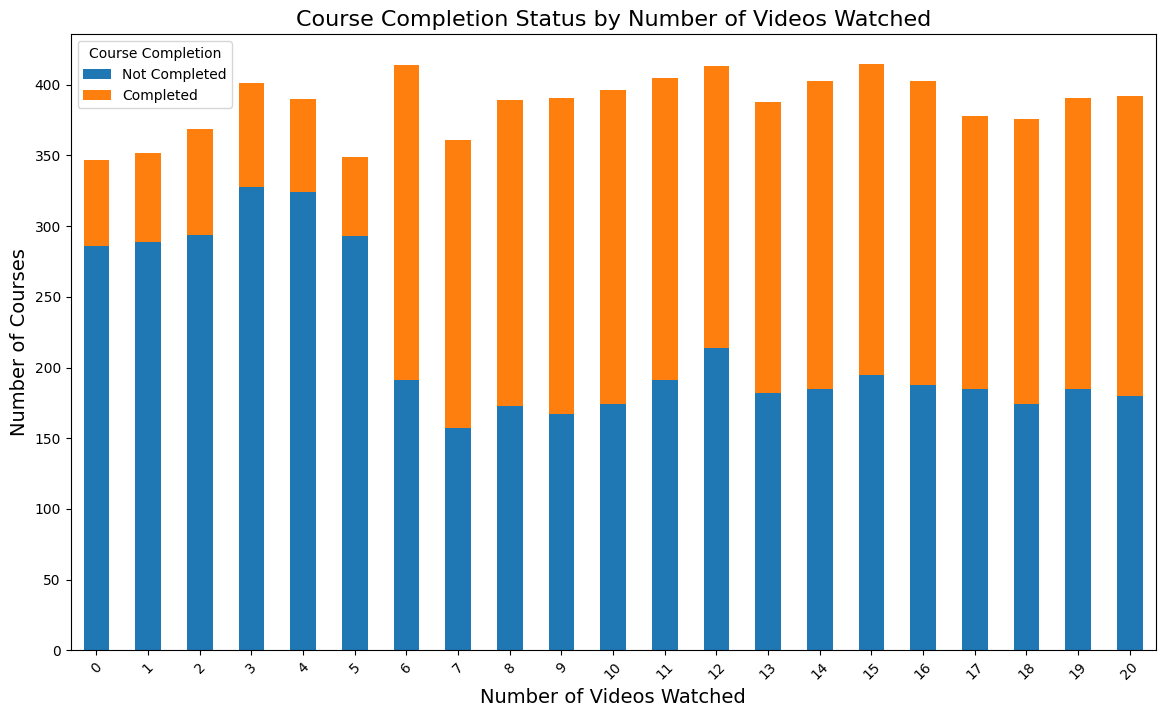

In [ ]:
# Counting the occurrences of combinations of 'NumberOfVideosWatched' and 'CourseCompletion'
videos_completion_counts = online_course_without_duplicates[['NumberOfVideosWatched', 'CourseCompletion']].value_counts().unstack()

# Plotting the data
videos_completion_counts.plot(kind='bar', stacked=True, figsize=(14, 8))

# Adding titles and labels
plt.title('Course Completion Status by Number of Videos Watched', fontsize=16)
plt.xlabel('Number of Videos Watched', fontsize=14)
plt.ylabel('Number of Courses', fontsize=14)
plt.legend(title='Course Completion', labels=['Not Completed', 'Completed'])
plt.xticks(rotation=45)

# Display the plot
plt.show()

Relationship between the number of videos watched and course completion:

There is a clear trend: the more videos a user watches, the higher the likelihood they will complete the course. For example, when the number of videos watched exceeds a certain threshold (e.g., 10-15), the number of completed courses significantly increases.

Courses where users watched only a few videos (e.g., 1-3) have a noticeably higher proportion of uncompleted courses.

Early stages of the course:

The chart shows that users who only watched the first few videos often drop out of the course. This may suggest that the early stages of the course are crucial for maintaining participant engagement.

Courses with a small number of videos watched but still completed may indicate a very concise course structure, where the content is well-concentrated, and users quickly achieve their intended goals.

The importance of full engagement:

The more videos a user watches, the more engaged they become in the course, which increases the chances of completing it. Therefore, it is important that courses are designed in a way that encourages users to continue and fully absorb the material.

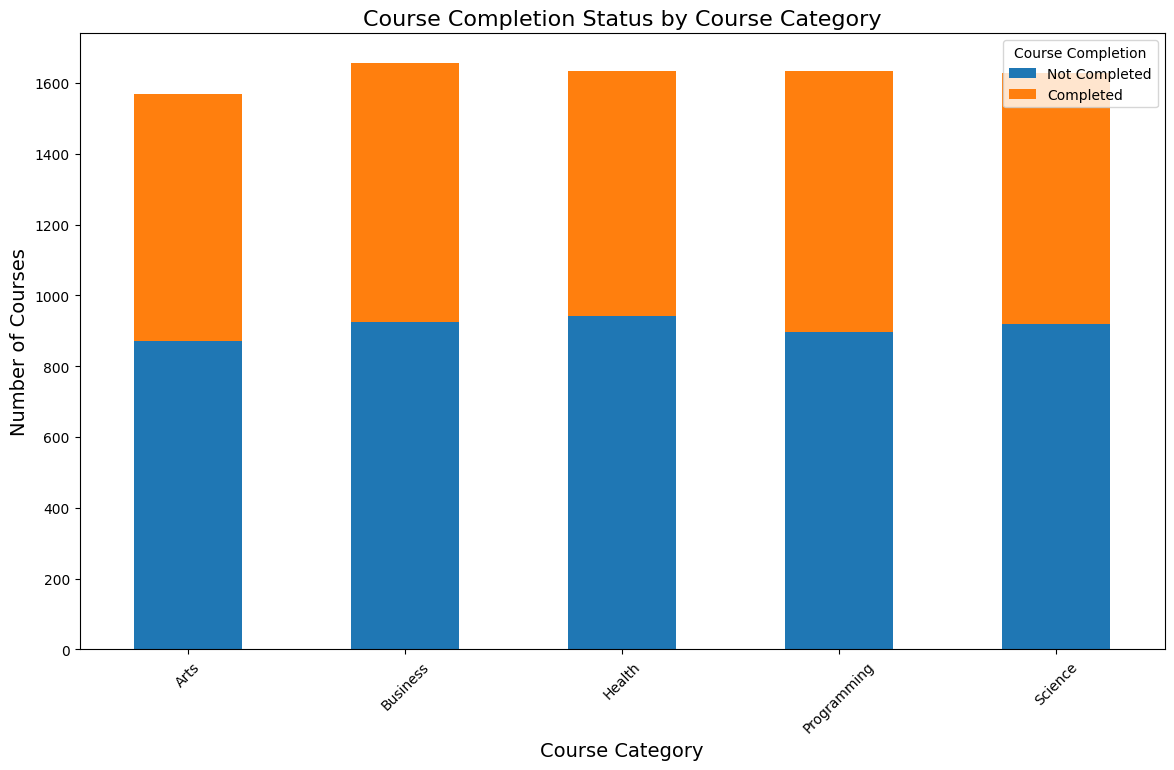

In [ ]:
# Counting the occurrences of combinations of 'CourseCategory' and 'CourseCompletion'
category_completion_counts = online_course_without_duplicates[['CourseCategory', 'CourseCompletion']].value_counts().unstack()

# Plotting the data
category_completion_counts.plot(kind='bar', stacked=True, figsize=(14, 8))

# Adding titles and labels
plt.title('Course Completion Status by Course Category', fontsize=16)
plt.xlabel('Course Category', fontsize=14)
plt.ylabel('Number of Courses', fontsize=14)
plt.legend(title='Course Completion', labels=['Not Completed', 'Completed'])
plt.xticks(rotation=45)

# Display the plot
plt.show()

Different course categories may have varying completion rates. In some categories, such as Business or Health, a higher number of completed courses can be observed compared to other categories.

On the other hand, in categories like Arts or Programming, there may be a higher number of uncompleted courses, suggesting that users are more likely to drop out of these courses.

Popularity and difficulty of categories:

Categories with a higher number of completed courses may be easier, more interesting to users, or better designed.
Categories with a higher number of uncompleted courses may be more difficult, less engaging, or not aligned with users' expectations.
Strategies for different categories:

For categories with a low completion rate, such as Programming, course creators might consider ways to increase engagement, such as introducing more interactive elements or adjusting the difficulty of the material.
Categories with a high completion rate can serve as a model for other areas. Analyzing what makes these courses more successful could be key.

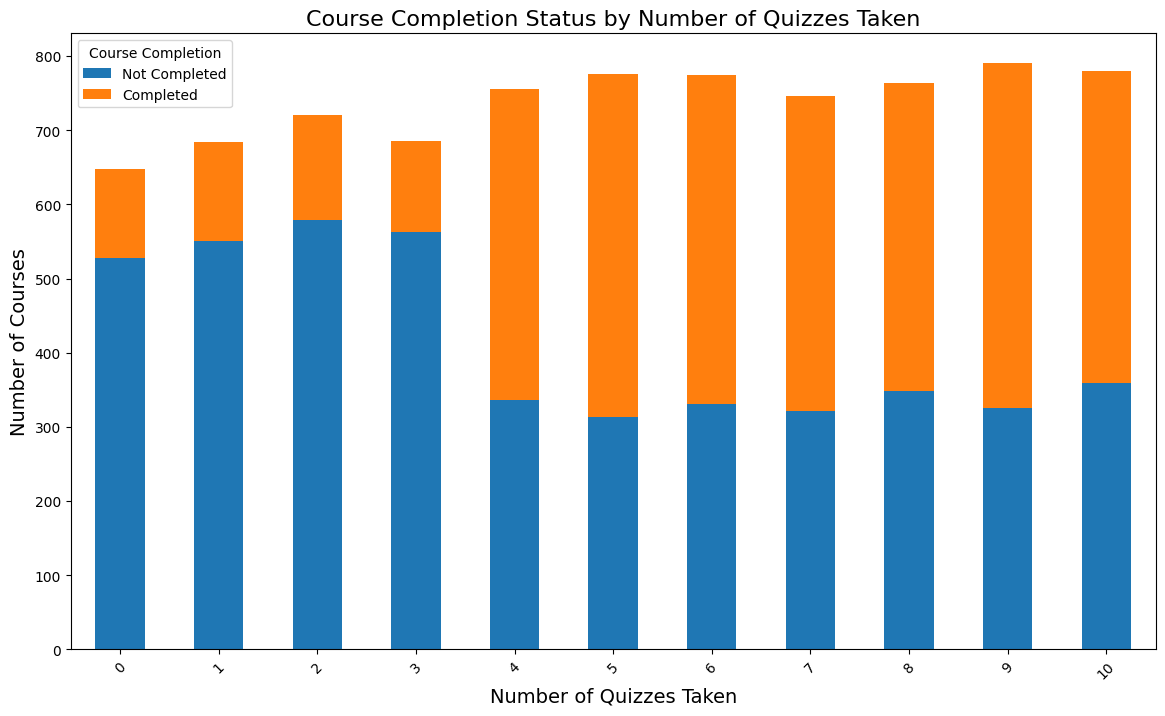

In [ ]:
# Counting the occurrences of combinations of 'NumberOfQuizzesTaken' and 'CourseCompletion'
quizzes_completion_counts = online_course_without_duplicates[['NumberOfQuizzesTaken', 'CourseCompletion']].value_counts().unstack()

# Plotting the data
quizzes_completion_counts.plot(kind='bar', stacked=True, figsize=(14, 8))

# Adding titles and labels
plt.title('Course Completion Status by Number of Quizzes Taken', fontsize=16)
plt.xlabel('Number of Quizzes Taken', fontsize=14)
plt.ylabel('Number of Courses', fontsize=14)
plt.legend(title='Course Completion', labels=['Not Completed', 'Completed'])
plt.xticks(rotation=45)

# Display the plot
plt.show()

Correlation Between Quizzes and Course Completion
Positive Correlation:

There is a noticeable trend that shows the more quizzes a user completes, the more likely they are to complete the course. This suggests that quizzes are not just assessments but play a crucial role in keeping users engaged.


Low Quiz Completion and Dropout Rates: Courses where users complete only a few quizzes—or none at all—tend to have lower completion rates. This could indicate that participants lose interest or motivation when they aren't regularly engaging with the course content through quizzes.
The Role of Quizzes in Engaging Users
Quizzes as Engagement Tools: Quizzes act as milestones within a course, giving users a sense of accomplishment and progress. This can be particularly motivating, as it breaks the course content into manageable sections and provides immediate feedback on their understanding.


Monitoring Progress: Regular quizzes help users track their learning progress, which can encourage them to stay committed to finishing the course. This is especially important in self-paced online courses, where users might need additional incentives to stay on track.
Review of Courses with Few Quizzes: For courses that currently have few or no quizzes, it may be beneficial to review and consider integrating more quizzes to see if it improves user engagement and course completion rates.

Effectiveness of Different Numbers of Quizzes
High Quiz Frequency and Retention: Courses with a higher number of quizzes (more than 5) often see higher completion rates. This could be because frequent quizzes help reinforce learning and keep users consistently engaged with the material.
Finding the Right Balance: While regular quizzes are beneficial, too many quizzes could potentially overwhelm users. It’s crucial to strike a balance—enough quizzes to maintain engagement and reinforce learning, but not so many that they become a burden or a source of anxiety for users.

<ipython-input-37-4d7cdd513f86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_course_without_duplicates['QuizScores_bin'] = pd.cut(


(array([0, 1, 2]),
 [Text(0, 0, '60-80'), Text(1, 0, '80-100'), Text(2, 0, '40-60')])

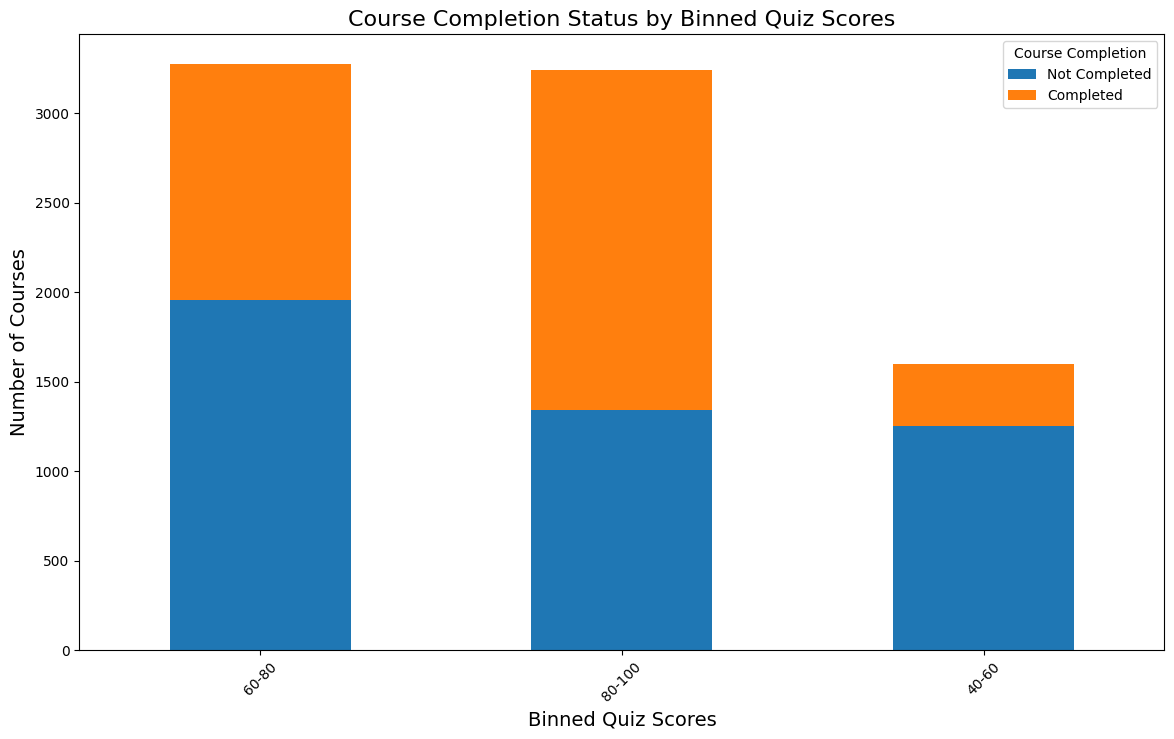

In [ ]:
# Binning the 'QuizScores' into intervals to simplify the visualization
online_course_without_duplicates['QuizScores_bin'] = pd.cut(
    online_course_without_duplicates['QuizScores'],
    bins=[0, 20, 40, 60, 80, 100],
    labels=['0-20', '20-40', '40-60', '60-80', '80-100']
)

# Counting the occurrences of combinations of 'QuizScores_bin' and 'CourseCompletion'
quiz_scores_completion_counts_binned = online_course_without_duplicates[['QuizScores_bin', 'CourseCompletion']].value_counts().unstack()

# Plotting the data
quiz_scores_completion_counts_binned.plot(kind='bar', stacked=True, figsize=(14, 8))

# Adding titles and labels
plt.title('Course Completion Status by Binned Quiz Scores', fontsize=16)
plt.xlabel('Binned Quiz Scores', fontsize=14)
plt.ylabel('Number of Courses', fontsize=14)
plt.legend(title='Course Completion', labels=['Not Completed', 'Completed'])
plt.xticks(rotation=45)

Relationship between quiz scores and course completion:

There is a clear correlation: the higher the quiz scores, the more likely a user is to complete the course. Users who achieve high quiz scores (e.g., 60-80 or 80-100) have higher course completion rates.

Courses where participants obtained low scores (0-20 or 20-40) tend to have more uncompleted courses. This suggests that low quiz scores may demotivate users from continuing with the course.

Impact of scores on motivation:

Participants who achieve high scores likely feel more confident in their understanding of the material, which motivates them to complete the course. High scores may also indicate that the course is well-suited to their skill level.

On the other hand, low scores may indicate difficulties in understanding the material, which could discourage further learning. Courses where scores are low may need to be revised to better support participants.

Strategies for different score ranges:

Courses with a large number of participants achieving high scores can be promoted as effective and well-designed.

Courses where scores are low may require additional support for participants, such as more detailed supplementary materials, live sessions, or more interactive forms of learning.

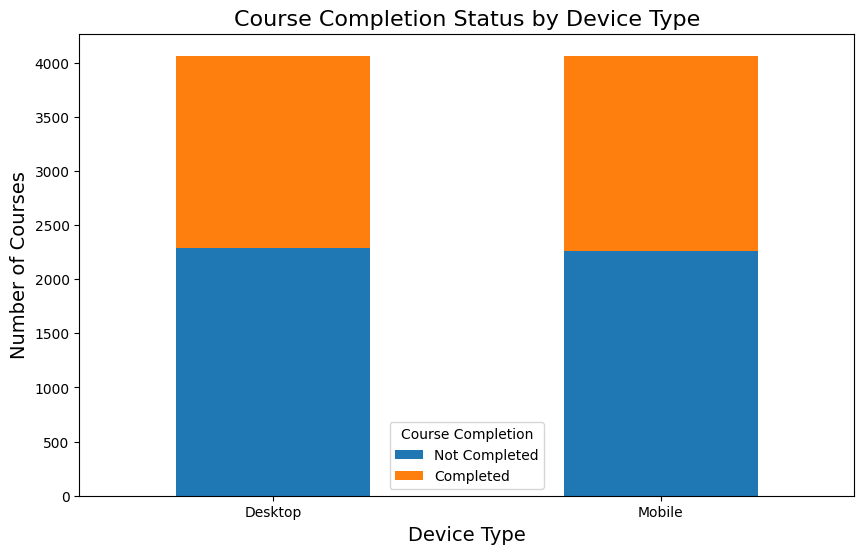

In [ ]:
# Counting the occurrences of combinations of 'DeviceType' and 'CourseCompletion'
device_completion_counts = online_course_without_duplicates[['DeviceType', 'CourseCompletion']].value_counts().unstack()

# Plotting the data
device_completion_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding titles and labels
plt.title('Course Completion Status by Device Type', fontsize=16)
plt.xlabel('Device Type', fontsize=14)
plt.ylabel('Number of Courses', fontsize=14)
plt.legend(title='Course Completion', labels=['Not Completed', 'Completed'])
plt.xticks(ticks=[0, 1], labels=['Desktop', 'Mobile'], rotation=0)

# Display the plot
plt.show()

Relationship between device type and course completion:

The chart indicates that the type of device may influence whether a course is completed. Depending on the data you have, differences can be observed between users of desktop devices and mobile devices.

For example, if more courses are completed by desktop users, this may suggest that learning on a desktop computer facilitates course completion, possibly due to better learning comfort, a larger screen, or greater accessibility to resources.

Mobile user preferences:

Mobile users may have a lower course completion rate, which could be due to various factors such as smaller screens, distractions, or more challenging access to educational resources. Courses that are more mobile-friendly may require a different structure to increase completion rates.

Adapting courses to different devices:

If the chart shows significant differences between device types, course creators should consider adapting the content and interface of courses to better suit the specifics of mobile or desktop devices.

Courses should be optimized for different types of devices to provide users with the best possible learning experience, regardless of the device they are using.

In [ ]:
# Grouping the 'CompletionRate' variable into intervals in the original DataFrame
online_course_without_duplicates['CompletionRate_bin'] = pd.cut(
    online_course_without_duplicates['CompletionRate'],
    bins=[0, 20, 40, 60, 80, 100],
    labels=['0-20', '20-40', '40-60', '60-80', '80-100']
)

<ipython-input-40-76e447d58892>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_course_without_duplicates['CompletionRate_bin'] = pd.cut(


In [ ]:
online_course_without_duplicates['CourseCategory'] = online_course_without_duplicates['CourseCategory'].astype('category').cat.codes #Transformation of the CourseCategory variable into a categorical variable

<ipython-input-41-a31ea0a06d1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_course_without_duplicates['CourseCategory'] = online_course_without_duplicates['CourseCategory'].astype('category').cat.codes #Transformation of the CourseCategory variable into a categorical variable


In [ ]:
online_course_without_duplicates['TimeSpentOnCourse_bin'] = online_course_without_duplicates['TimeSpentOnCourse_bin'].astype('category').cat.codes #Transformation of the TimeSpentOnCourse variable into a categorical variable

<ipython-input-42-c51e1ce1a74c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_course_without_duplicates['TimeSpentOnCourse_bin'] = online_course_without_duplicates['TimeSpentOnCourse_bin'].astype('category').cat.codes #Transformation of the TimeSpentOnCourse variable into a categorical variable


In [ ]:
online_course_without_duplicates['CompletionRate_bin'] = online_course_without_duplicates['CompletionRate_bin'].astype('category').cat.codes #Transformation of the CompletionRate variable into a categorical variable

<ipython-input-43-c6c72ab9e4b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_course_without_duplicates['CompletionRate_bin'] = online_course_without_duplicates['CompletionRate_bin'].astype('category').cat.codes #Transformation of the CompletionRate variable into a categorical variable


In [ ]:
online_course_without_duplicates['QuizScores_bin'] = online_course_without_duplicates['QuizScores_bin'].astype('category').cat.codes #Transformation of the QuizScores variable into a categorical variable

<ipython-input-44-1accf1d6c9f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_course_without_duplicates['QuizScores_bin'] = online_course_without_duplicates['QuizScores_bin'].astype('category').cat.codes #Transformation of the QuizScores variable into a categorical variable


In [ ]:
online_course_without_duplicates.head()

UserID  CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0    5618               2          29.979719                     17   
1    4326               0          27.802640                      1   
2    5849               0          86.820485                     14   
3    4992               4          35.038427                     17   
4    3866               3          92.490647                     16   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                     3   50.365656       20.860773           1   
1                     5   62.615970       65.632415           1   
2                     2   78.458962       63.812007           1   
3                    10   59.198853       95.433162           0   
4                     0   98.428285       18.102478           0   

   CourseCompletion  TimeSpentOnCourse_bin  QuizScores_bin  CompletionRate_bin  
0                 0                      1               2                   1  
1                 0                      1               3                   3  
2                 1                      4               3                   3  
3                 1                      2               2                   4  
4                 0                      4               4                   0

In [ ]:
new_dataframe_reduced = online_course_without_duplicates.drop(columns=['UserID', 'TimeSpentOnCourse', 'QuizScores', 'CompletionRate'])
new_dataframe_reduced.head()

CourseCategory  NumberOfVideosWatched  NumberOfQuizzesTaken  DeviceType  \
0               2                     17                     3           1   
1               0                      1                     5           1   
2               0                     14                     2           1   
3               4                     17                    10           0   
4               3                     16                     0           0   

   CourseCompletion  TimeSpentOnCourse_bin  QuizScores_bin  CompletionRate_bin  
0                 0                      1               2                   1  
1                 0                      1               3                   3  
2                 1                      4               3                   3  
3                 1                      2               2                   4  
4                 0                      4               4                   0

# Logistic Regression

In [ ]:
# Splitting the dataset into a training set and a test set
y = new_dataframe_reduced.pop('CourseCompletion')
X = new_dataframe_reduced

In [ ]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: CourseCompletion, dtype: int64

In [ ]:
y.shape

(8123,)

In [ ]:
X.head()

CourseCategory  NumberOfVideosWatched  NumberOfQuizzesTaken  DeviceType  \
0               2                     17                     3           1   
1               0                      1                     5           1   
2               0                     14                     2           1   
3               4                     17                    10           0   
4               3                     16                     0           0   

   TimeSpentOnCourse_bin  QuizScores_bin  CompletionRate_bin  
0                      1               2                   1  
1                      1               3                   3  
2                      4               3                   3  
3                      2               2                   4  
4                      4               4                   0

In [ ]:
X.head()

CourseCategory  NumberOfVideosWatched  NumberOfQuizzesTaken  DeviceType  \
0               2                     17                     3           1   
1               0                      1                     5           1   
2               0                     14                     2           1   
3               4                     17                    10           0   
4               3                     16                     0           0   

   TimeSpentOnCourse_bin  QuizScores_bin  CompletionRate_bin  
0                      1               2                   1  
1                      1               3                   3  
2                      4               3                   3  
3                      2               2                   4  
4                      4               4                   0

In [ ]:
# Preparation of the variables x and y for the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
def evaluate_model(model, X_train=X_train, X_test=X_test):

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Display of the confusion matrix.
    cm_train = confusion_matrix(y_train, y_train_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion matrix')
    plt.show()


    # Display of the classification report.
    report_train = classification_report(y_train, y_train_pred)
    print("Classification report:")
    print(report_train)

    # Display of the accuracy
    accuracy_score_train = accuracy_score(y_train, y_train_pred)
    print("Accuracy_train:")
    print(accuracy_score_train)

    # Display of the confusion matrix
    cm_test = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion matrix')
    plt.show()

    # Display of the classification report.
    report_test = classification_report(y_test, y_test_pred)
    print("Classification report:")
    print(report_test)

    # Display of the accuracy
    accuracy_score_test = accuracy_score(y_test, y_test_pred)
    print("Accuracy_test:")
    print(accuracy_score_test)

In [ ]:
logistic_model = LogisticRegression() # Definition of the model

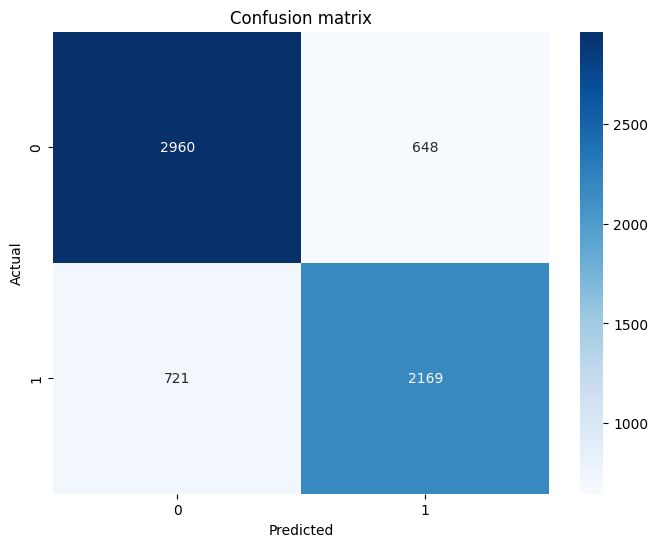

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      3608
           1       0.77      0.75      0.76      2890

    accuracy                           0.79      6498
   macro avg       0.79      0.79      0.79      6498
weighted avg       0.79      0.79      0.79      6498

Accuracy_train:
0.7893197907048323


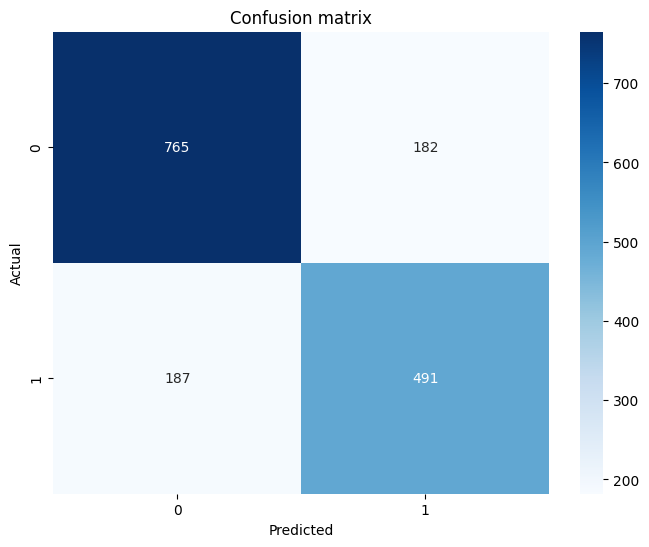

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       947
           1       0.73      0.72      0.73       678

    accuracy                           0.77      1625
   macro avg       0.77      0.77      0.77      1625
weighted avg       0.77      0.77      0.77      1625

Accuracy_test:
0.7729230769230769


In [ ]:
evaluate_model(logistic_model)

On the training set class 0 (Course not completed): The model has a higher recall (82%) for this class, meaning it correctly identifies most instances were the course was not completed. Precision (80%) is also strong, suggesting that when the model predicts a course is not completed, it is likely correct. Class 1 (Course completed): The model has a recall of 75% for this class, which is lower than for class 0. This indicates that the model misses some instances where the course was completed. The precision is 77%, indicating that when the model predicts a course was completed, it is correct most of the time. On the test set class 0 has recall 81%, precision 80%. Class 1 has recall 72%, precision 73%. Analyzing the report, we see that the model performs better in predicting class 0 than class 1. The accuracy on the training set amounts to 78%, while on the test set it amounts to 77%

In addition to the classification report, we can also calculate the AUC and plot the ROC curve. The ROC curve can be plotted in two ways: using the RocCurveDisplay function—where we pass the trained model and the test set values as arguments—or using roc_curve—in which case we first need to calculate the true positive rate and false positive rate values, and then plot the curve defined by these points.

In [ ]:
# Calculating ROC Curve and Area Under the Curve
y_pred = logistic_model.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7660014702538369

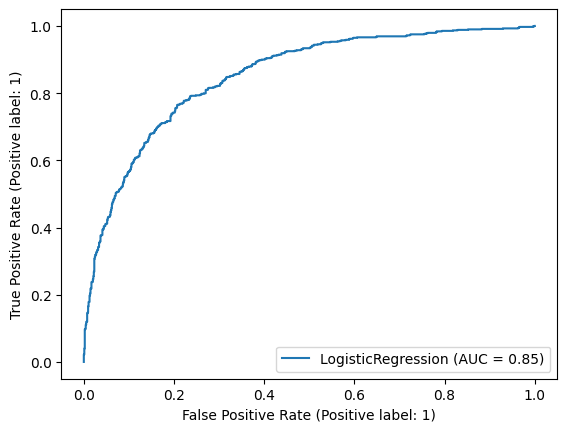

In [ ]:
RocCurveDisplay.from_estimator(logistic_model, X_test, y_test)

In [ ]:
# Calculatin true positive rate and false positive rate
fpr, tpr, threshold = roc_curve(y_test, y_pred)

In [ ]:
# Generating auxiliary data.
help_prob = [0 for _ in range(len(y_test))]
help_fpr, help_tpr, _= roc_curve(y_test, help_prob)

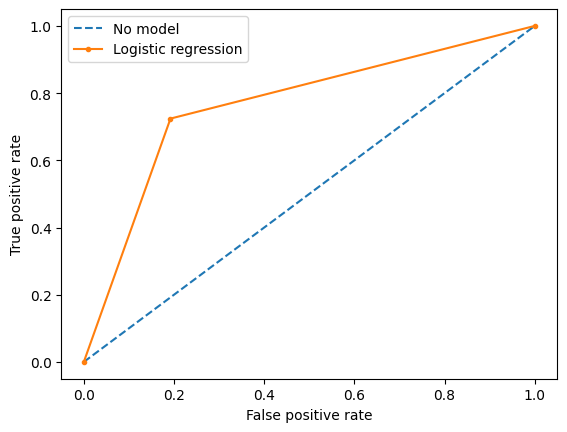

In [ ]:
plt.plot(help_fpr, help_tpr, linestyle='--', label='No model')
plt.plot(fpr, tpr, marker='.', label='Logistic regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

The curve on the charts indicates the quality of the model. For the above model, the dashed diagonal line represents the situation where predictions would be made without using a predictive model. The orange curve represents the quality of the logistic regression model. The further this curve deviates from the auxiliary line towards a value of 1, the better the model.







In [ ]:
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":logistic_model.coef_[0]})

Feature  Coefficients
0         CourseCategory     -0.004369
1  NumberOfVideosWatched      0.136565
2   NumberOfQuizzesTaken      0.302471
3             DeviceType      0.015690
4  TimeSpentOnCourse_bin      0.420796
5         QuizScores_bin      1.244796
6     CompletionRate_bin      0.744503

Based on the table, we can see that the variables CompletionRate and QuizScores have the greatest impact on course completion.









# Support Vector Machine

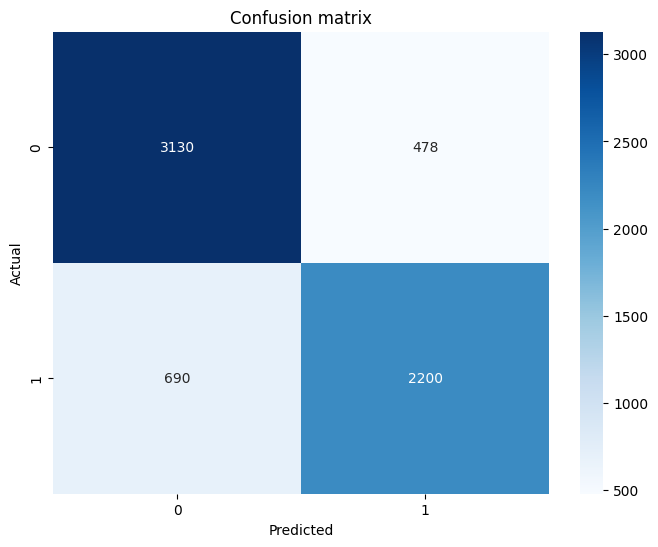

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      3608
           1       0.82      0.76      0.79      2890

    accuracy                           0.82      6498
   macro avg       0.82      0.81      0.82      6498
weighted avg       0.82      0.82      0.82      6498

Accuracy_train:
0.8202523853493383


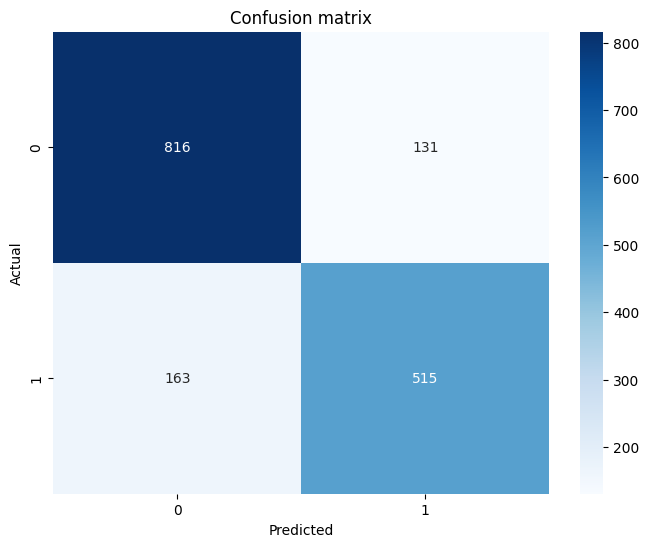

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       947
           1       0.80      0.76      0.78       678

    accuracy                           0.82      1625
   macro avg       0.82      0.81      0.81      1625
weighted avg       0.82      0.82      0.82      1625

Accuracy_test:
0.819076923076923


In [ ]:
# The SVM model with a polynomial kernel
svm_poli = SVC(kernel='poly')
evaluate_model(svm_poli)

Analyzing the confusion matrix on the training set, we can see that 3,130 observations were correctly classified as 0 (the person did not complete the course), and 2,200 observations were correctly classified as 1 (the person did complete the course). On the test set, 816 observations were correctly classified as 0, while 515 observations were correctly classified as 1. The accuracy on the training set amounts to 82%, while on the test set it amounts to 81%.

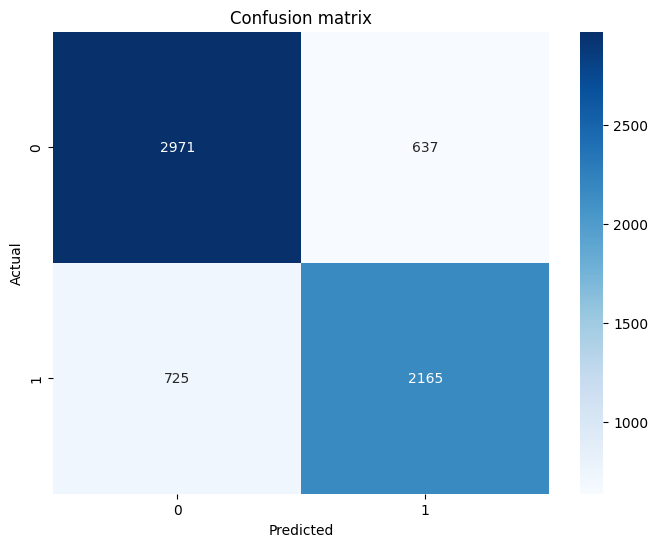

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      3608
           1       0.77      0.75      0.76      2890

    accuracy                           0.79      6498
   macro avg       0.79      0.79      0.79      6498
weighted avg       0.79      0.79      0.79      6498

Accuracy_train:
0.7903970452446907


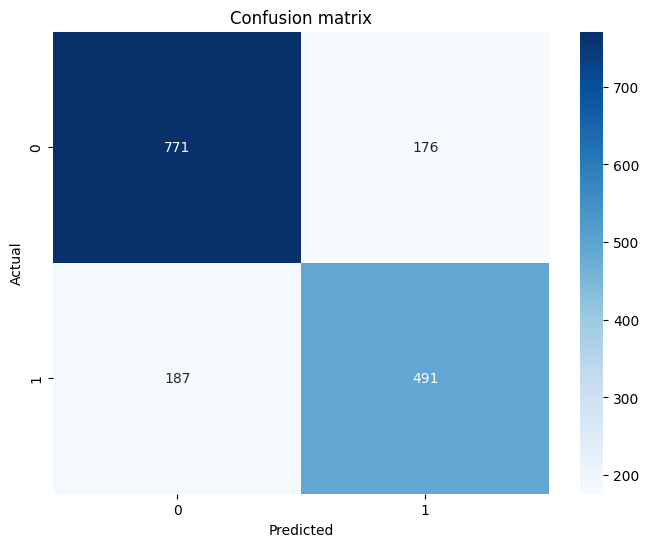

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       947
           1       0.74      0.72      0.73       678

    accuracy                           0.78      1625
   macro avg       0.77      0.77      0.77      1625
weighted avg       0.78      0.78      0.78      1625

Accuracy_test:
0.7766153846153846


In [ ]:
# The SVM model with a linear kernel
svm_linear = SVC(kernel='linear')
evaluate_model(svm_linear)

Analyzing the confusion matrix on the training set, we can see that 2,971 observations were correctly classified as 0 (the person did not complete the course), and 2,165 observations were correctly classified as 1 (the person did complete the course). On the test set, 771 observations were correctly classified as 0, while 491 observations were correctly classified as 1. The accuracy on the training set amounts to 79%, while on the test set it amounts to 77%.

# Decision Tree

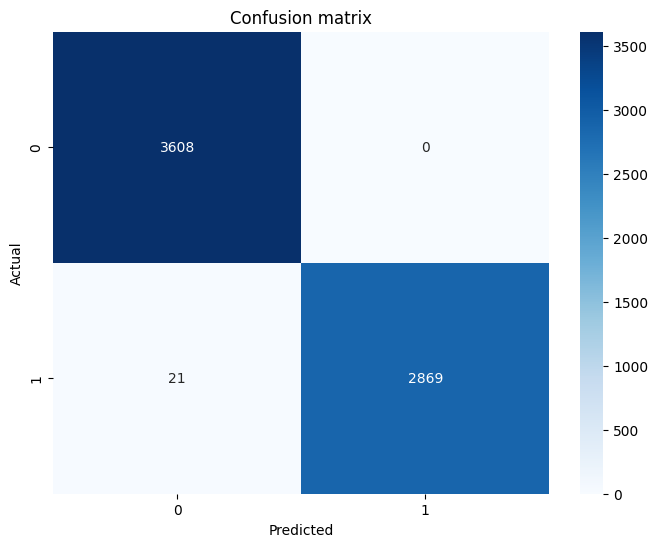

Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3608
           1       1.00      0.99      1.00      2890

    accuracy                           1.00      6498
   macro avg       1.00      1.00      1.00      6498
weighted avg       1.00      1.00      1.00      6498

Accuracy_train:
0.9967682363804248


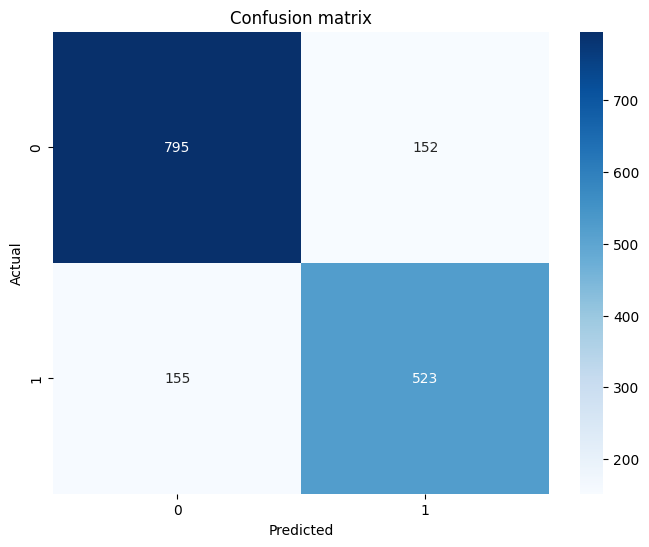

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       947
           1       0.77      0.77      0.77       678

    accuracy                           0.81      1625
   macro avg       0.81      0.81      0.81      1625
weighted avg       0.81      0.81      0.81      1625

Accuracy_test:
0.811076923076923


In [ ]:
# The Decision Tree model
dt = DecisionTreeClassifier()
evaluate_model(dt)

The accuracy on the training set amounts to 99%, while on the test set it amounts to 80%. The model is overfitted.

In [ ]:
# The depth of the tree
dt.get_depth()

21

In [ ]:
# The number of leaves
dt.get_n_leaves()

1262

In [ ]:
# feature importance
dt.feature_importances_

array([0.07147438, 0.23282101, 0.1989848 , 0.03122032, 0.10556793,
       0.17054282, 0.18938873])

We can see that the variables Number Of Videos Watched and Number Of Quizzes Taken have the greatest impact on course completion.


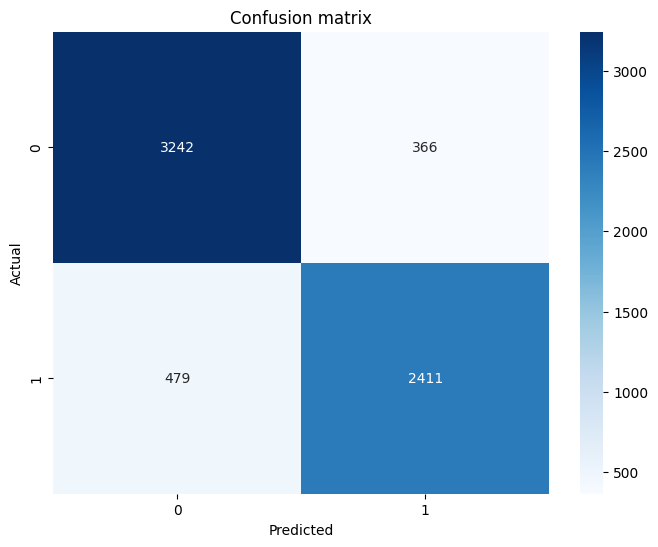

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3608
           1       0.87      0.83      0.85      2890

    accuracy                           0.87      6498
   macro avg       0.87      0.87      0.87      6498
weighted avg       0.87      0.87      0.87      6498

Accuracy_train:
0.8699599876885196


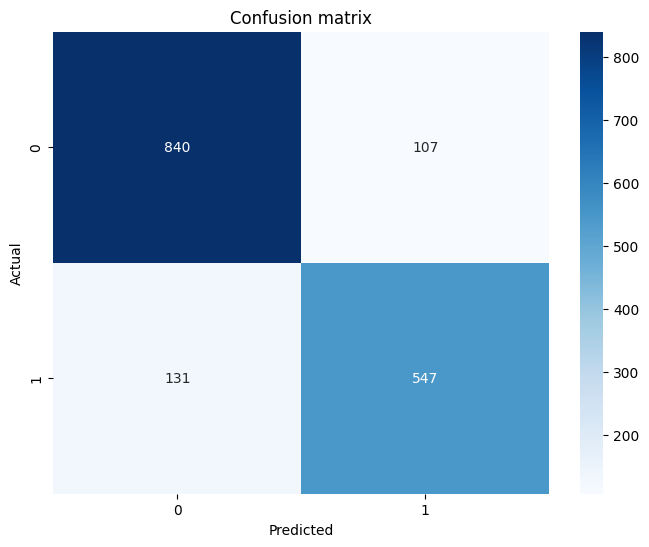

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       947
           1       0.84      0.81      0.82       678

    accuracy                           0.85      1625
   macro avg       0.85      0.85      0.85      1625
weighted avg       0.85      0.85      0.85      1625

Accuracy_test:
0.8535384615384616


In [ ]:
dt2 = DecisionTreeClassifier(max_depth=6, criterion = 'entropy')
evaluate_model(dt2)

The accuracy on the training set amounts to 86%, while on the test set it amounts to 85%.


# Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


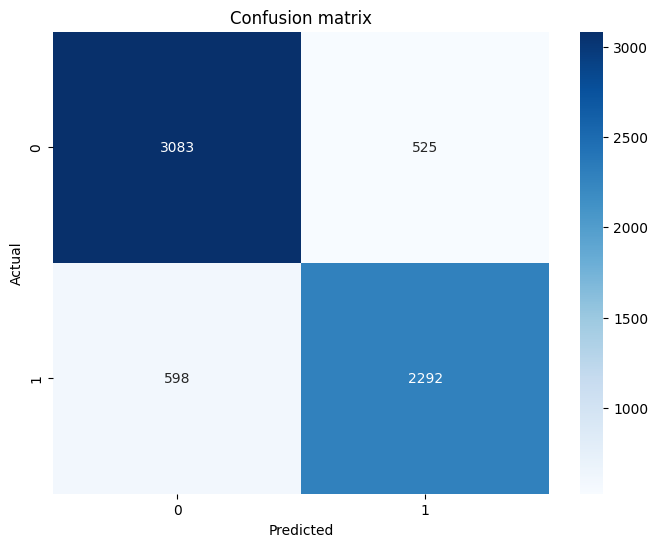

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      3608
           1       0.81      0.79      0.80      2890

    accuracy                           0.83      6498
   macro avg       0.83      0.82      0.82      6498
weighted avg       0.83      0.83      0.83      6498

Accuracy_train:
0.8271775931055709


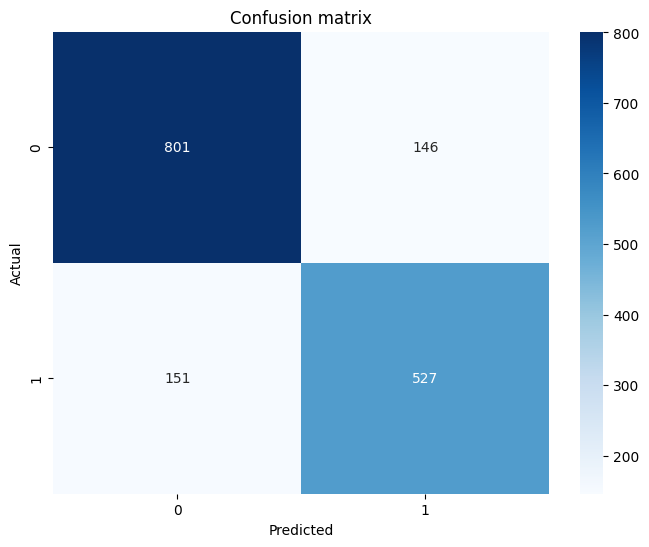

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       947
           1       0.78      0.78      0.78       678

    accuracy                           0.82      1625
   macro avg       0.81      0.81      0.81      1625
weighted avg       0.82      0.82      0.82      1625

Accuracy_test:
0.8172307692307692


In [ ]:
# Defining the model with SVC estimator and 50 estimators
bagging_model = BaggingClassifier(base_estimator = SVC(), n_estimators=50, random_state=123)
evaluate_model(bagging_model)

The accuracy on the training set amounts to 82%, while on the test set it amounts to 81%.


# Random Forest

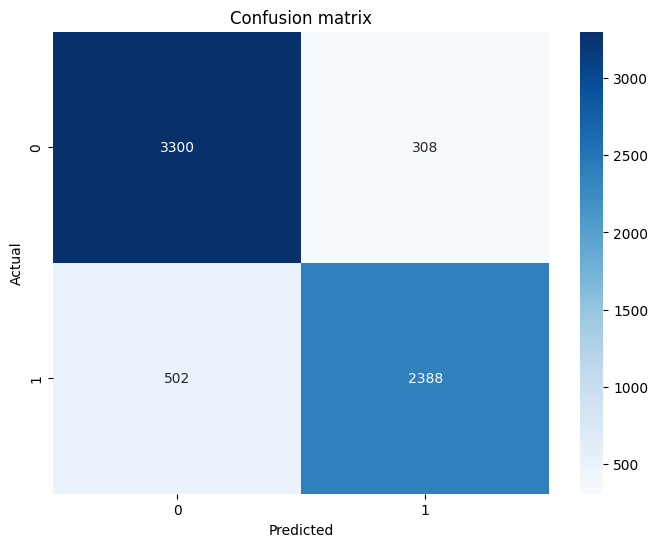

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3608
           1       0.89      0.83      0.85      2890

    accuracy                           0.88      6498
   macro avg       0.88      0.87      0.87      6498
weighted avg       0.88      0.88      0.87      6498

Accuracy_train:
0.8753462603878116


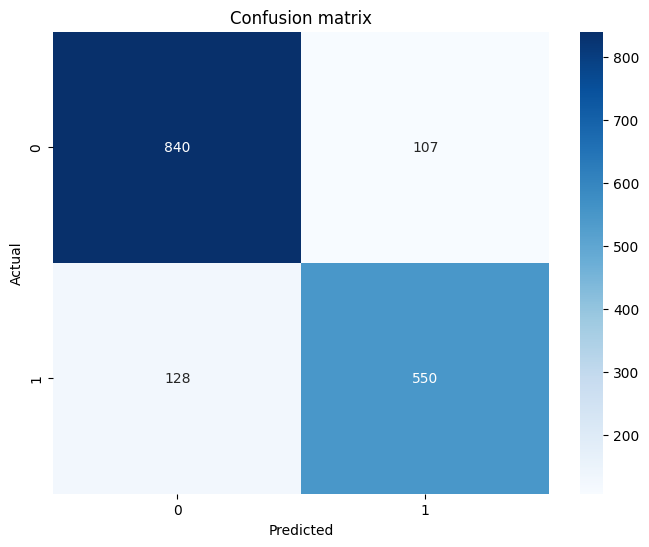

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       947
           1       0.84      0.81      0.82       678

    accuracy                           0.86      1625
   macro avg       0.85      0.85      0.85      1625
weighted avg       0.85      0.86      0.86      1625

Accuracy_test:
0.8553846153846154


In [ ]:
# Defining the Random Forest model
rf = RandomForestClassifier(n_estimators=50, random_state=123, max_depth=6)
evaluate_model(rf)

The accuracy on the training set amounts to 87%, while on the test set it amounts to 85%.


# Boosting Models

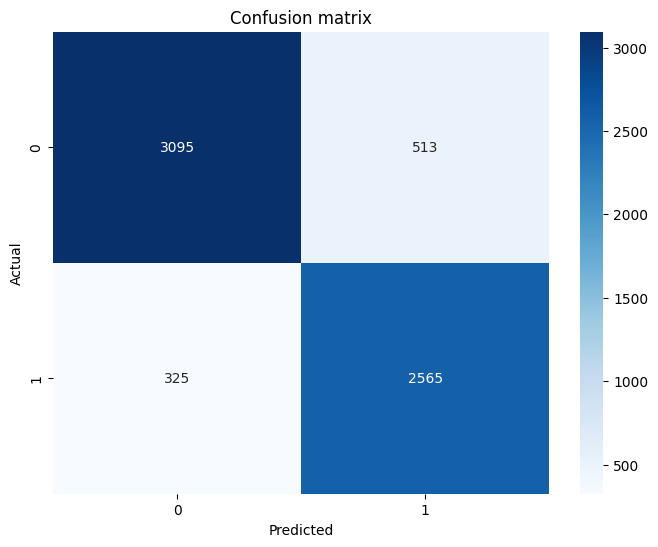

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3608
           1       0.83      0.89      0.86      2890

    accuracy                           0.87      6498
   macro avg       0.87      0.87      0.87      6498
weighted avg       0.87      0.87      0.87      6498

Accuracy_train:
0.871037242228378


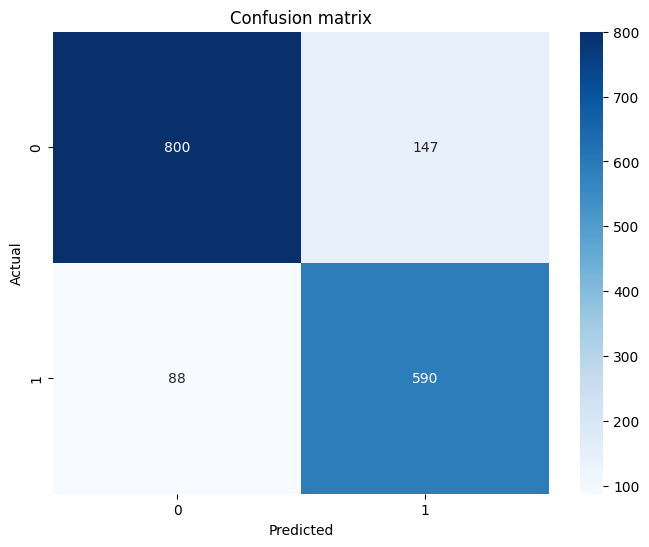

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       947
           1       0.80      0.87      0.83       678

    accuracy                           0.86      1625
   macro avg       0.85      0.86      0.85      1625
weighted avg       0.86      0.86      0.86      1625

Accuracy_test:
0.8553846153846154


In [ ]:
# Defining the Adaboost model
adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)
evaluate_model(adaboost)

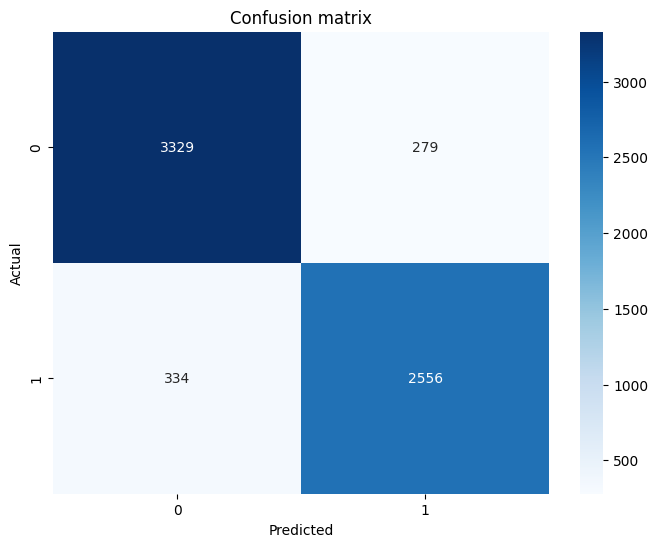

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3608
           1       0.90      0.88      0.89      2890

    accuracy                           0.91      6498
   macro avg       0.91      0.90      0.90      6498
weighted avg       0.91      0.91      0.91      6498

Accuracy_train:
0.9056632810095414


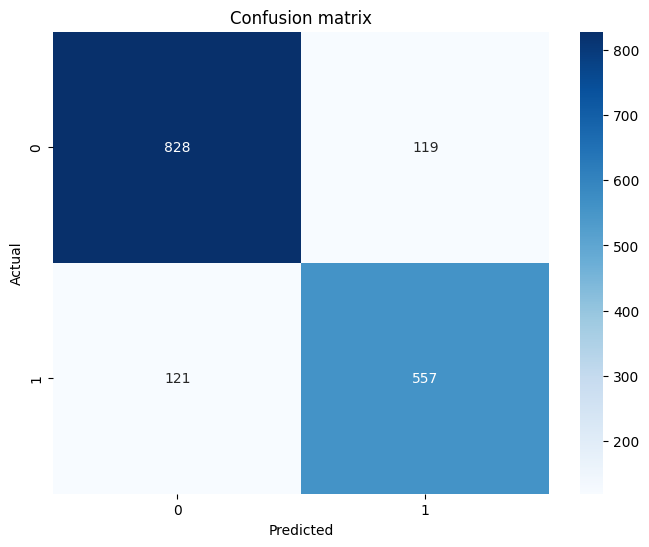

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       947
           1       0.82      0.82      0.82       678

    accuracy                           0.85      1625
   macro avg       0.85      0.85      0.85      1625
weighted avg       0.85      0.85      0.85      1625

Accuracy_test:
0.8523076923076923


In [ ]:
# Defining the Gradient Boosting Classifier model
gb = GradientBoostingClassifier(n_estimators=100, random_state=0, learning_rate=1.0)
evaluate_model(gb)

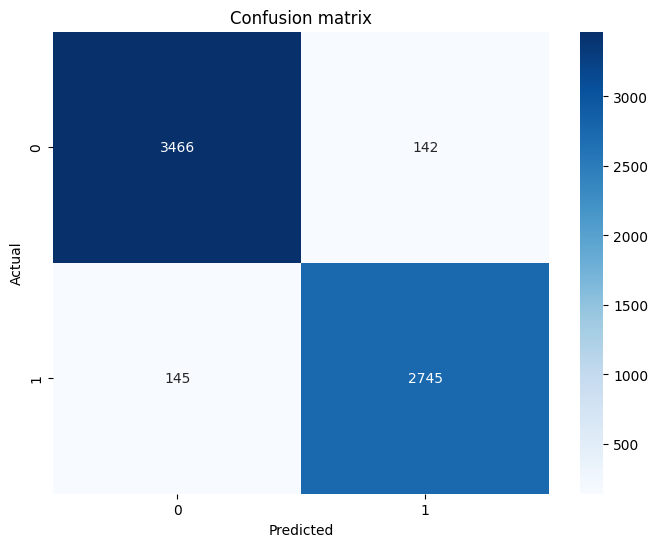

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3608
           1       0.95      0.95      0.95      2890

    accuracy                           0.96      6498
   macro avg       0.96      0.96      0.96      6498
weighted avg       0.96      0.96      0.96      6498

Accuracy_train:
0.9558325638658048


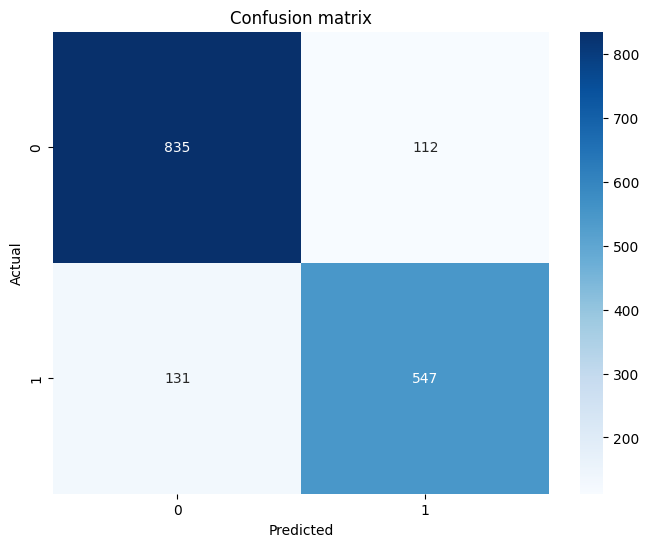

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       947
           1       0.83      0.81      0.82       678

    accuracy                           0.85      1625
   macro avg       0.85      0.84      0.85      1625
weighted avg       0.85      0.85      0.85      1625

Accuracy_test:
0.8504615384615385


In [ ]:
# Defining the XGBoost model
xgb = xgb.XGBClassifier()
evaluate_model(xgb)

Analyzing the boosting models, the AdaBoost model performed the best. The accuracy on the training set amounts to 87%, while on the test set it amounts to 85%.









# Summary
In this project, I have conducted a detailed EDA to understand the data and important features. Based on exploratory analysis, I performed data preprocessing and feature engineering. Finally, I train logistic regression model, Support Vector MAchines models, Tree-based models, Bagging and Boosting models. The best model turned out to be Decission Tree model with accurary 85%